# Water Budget Results: Plot Delta Precipitation

Plot precipitation items from the water budget results

## Parameters and Imports

In [1]:
%matplotlib inline

In [2]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pickle
import seaborn as sns
from scipy.signal import butter, lfilter, freqz, sosfilt
from copy import deepcopy

In [3]:
# to run if font not found
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

['C:\\Windows\\Fonts\\consola.ttf',
 'C:\\Windows\\Fonts\\arialbd.ttf',
 'C:\\Windows\\Fonts\\BOD_PSTC.TTF',
 'C:\\Windows\\Fonts\\cambriaz.ttf',
 'C:\\Windows\\Fonts\\ANTQUAI.TTF',
 'C:\\Windows\\Fonts\\corbelli.ttf',
 'C:\\Windows\\Fonts\\YuGothR.ttc',
 'C:\\Windows\\Fonts\\SourceSansPro-Light.ttf',
 'C:\\Windows\\Fonts\\ANTQUABI.TTF',
 'C:\\Windows\\Fonts\\NIAGSOL.TTF',
 'C:\\Windows\\Fonts\\MSUIGHUB.TTF',
 'C:\\Windows\\Fonts\\SHOWG.TTF',
 'C:\\Windows\\Fonts\\gadugi.ttf',
 'C:\\Windows\\Fonts\\ntailub.ttf',
 'C:\\Windows\\Fonts\\BELL.TTF',
 'C:\\Windows\\Fonts\\himalaya.ttf',
 'C:\\Windows\\Fonts\\comicz.ttf',
 'C:\\Windows\\Fonts\\consolab.ttf',
 'C:\\Windows\\Fonts\\ANTQUAB.TTF',
 'C:\\Windows\\Fonts\\SourceSansPro-ExtraLightItalic.ttf',
 'C:\\Windows\\Fonts\\COPRGTB.TTF',
 'C:\\Windows\\Fonts\\timesbd.ttf',
 'C:\\Windows\\Fonts\\segoescb.ttf',
 'C:\\Windows\\Fonts\\SitkaI.ttc',
 'C:\\Windows\\Fonts\\impact.ttf',
 'C:\\Windows\\Fonts\\SourceSansPro-BoldItalic.ttf',
 'C:\\Windows

In [4]:
# changes so Source Sans Pro used in plots and so fonts are not embedded as paths
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'SourceSansPro-Regular'

In [5]:
IN_DIR = r'C:\Users\nmart\OneDrive\CC_IRD\Process_Results'
SIM_ROOT = "DC_WGMN4"
XLSX_ROOT = "%s_ProcessMonthly_Stats.xlsx"

In [6]:
OUT_DIR = r'C:\Users\nmart\Documents\CC_Plots'

In [7]:
# Butterworth filter
# functions from 
# https://stackoverflow.com/questions/25191620/creating-lowpass-filter-in-scipy-understanding-methods-and-units
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    sos = butter(order, normal_cutoff, btype='lowpass', analog=False, output='sos' )
    return sos

def butter_lowpass_filter(data, cutoff, fs, order=5):
    sos = butter_lowpass(cutoff, fs, order=order)
    y = sosfilt(sos, data)
    return y

# definitions for Butterworth filtering
FS = 12      # samples per year
NYQ = 0.5 * FS
CUTOFF = (1.0/4.0)   # cutoff rate in years
FS, NYQ, CUTOFF

(12, 6.0, 0.25)

In [8]:
SM_NUM = 16

In [9]:
# time periods
TP_DICT = { 1 : [ dt.datetime(1981, 1, 1), dt.datetime(2010, 12, 31)],
            2 : [ dt.datetime(2011, 1, 1), dt.datetime(2040, 12, 31)],
            3 : [ dt.datetime(2041, 1, 1), dt.datetime(2070, 12, 31)],
            4 : [ dt.datetime(2071, 1, 1), dt.datetime(2100, 12, 31)],}

In [10]:
OurQs = np.array( [ round( 0.01 * x, 2 ) for x in range(101) ], dtype=np.float32 )
NumQs = len( OurQs )
NumQs

101

In [11]:
StatsHdsList = list()
for iI in range(NumQs):
    cQ = OurQs[iI]
    Hdr = "%d_ptile" % round(cQ * 100.0)
    StatsHdsList.append( Hdr )
# end of for
StatsHdsList.append( "Average" )
StatsHdsList.append( "Variance" )
StatsHdsList.append( "Skew" )
StatsHdsList.append( "Kurt" )

In [12]:
NumHdrs = len( StatsHdsList )
NumHdrs

105

In [13]:
RdHds = deepcopy( StatsHdsList )
RdHds.insert( 0, "Date" )

## Load from Spreadsheets

### Precip

In [14]:
InFile1 = os.path.normpath( os.path.join( IN_DIR, XLSX_ROOT % SIM_ROOT ) )
S1PreStats1 = pd.read_excel( InFile1, sheet_name="Precip_1", header=0, names=RdHds, index_col=0,
                             parse_dates=True )

In [15]:
display( HTML( S1PreStats1.head().to_html() ) )

,0_ptile,1_ptile,2_ptile,3_ptile,4_ptile,5_ptile,6_ptile,7_ptile,8_ptile,9_ptile,10_ptile,11_ptile,12_ptile,13_ptile,14_ptile,15_ptile,16_ptile,17_ptile,18_ptile,19_ptile,20_ptile,21_ptile,22_ptile,23_ptile,24_ptile,25_ptile,26_ptile,27_ptile,28_ptile,29_ptile,30_ptile,31_ptile,32_ptile,33_ptile,34_ptile,35_ptile,36_ptile,37_ptile,38_ptile,39_ptile,40_ptile,41_ptile,42_ptile,43_ptile,44_ptile,45_ptile,46_ptile,47_ptile,48_ptile,49_ptile,50_ptile,51_ptile,52_ptile,53_ptile,54_ptile,55_ptile,56_ptile,57_ptile,58_ptile,59_ptile,60_ptile,61_ptile,62_ptile,63_ptile,64_ptile,65_ptile,66_ptile,67_ptile,68_ptile,69_ptile,70_ptile,71_ptile,72_ptile,73_ptile,74_ptile,75_ptile,76_ptile,77_ptile,78_ptile,79_ptile,80_ptile,81_ptile,82_ptile,83_ptile,84_ptile,85_ptile,86_ptile,87_ptile,88_ptile,89_ptile,90_ptile,91_ptile,92_ptile,93_ptile,94_ptile,95_ptile,96_ptile,97_ptile,98_ptile,99_ptile,100_ptile,Average,Variance,Skew,Kurt
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1981-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1981-02-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1981-03-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1981-04-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1981-05-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
S1MaxPrecip1 = S1PreStats1[StatsHdsList[100]].max()
S1MinPrecip1 = S1PreStats1[StatsHdsList[0]].min()
S1MaxPrecip1, S1MinPrecip1

(0, 0)

In [17]:
S1PreStats2 = pd.read_excel( InFile1, sheet_name="Precip_2", header=0, names=RdHds, index_col=0,
                             parse_dates=True )

In [18]:
S1MaxPrecip2 = S1PreStats2[StatsHdsList[100]].max()
S1MinPrecip2 = S1PreStats2[StatsHdsList[0]].min()
S1MaxPrecip2, S1MinPrecip2

(181.8394197593443, -49.61431437538704)

In [19]:
S1PreStats3 = pd.read_excel( InFile1, sheet_name="Precip_3", header=0, names=RdHds, index_col=0,
                             parse_dates=True )

In [20]:
S1MaxPrecip3 = S1PreStats3[StatsHdsList[100]].max()
S1MinPrecip3 = S1PreStats3[StatsHdsList[0]].min()
S1MaxPrecip3, S1MinPrecip3

(165.4470519888564, -47.0256553828367)

In [21]:
S1PreStats4 = pd.read_excel( InFile1, sheet_name="Precip_4", header=0, names=RdHds, index_col=0,
                             parse_dates=True )

In [22]:
S1MaxPrecip4 = S1PreStats4[StatsHdsList[100]].max()
S1MinPrecip4 = S1PreStats4[StatsHdsList[0]].min()
S1MaxPrecip4, S1MinPrecip4

(188.7078631739714, -45.85785941878567)

In [23]:
S1MaxPrecip = max( S1MaxPrecip1, S1MaxPrecip2, S1MaxPrecip3, S1MaxPrecip4 )
S1MinPrecip = min( S1MinPrecip1, S1MinPrecip2, S1MinPrecip3, S1MinPrecip4 )
S1MaxPrecip, S1MinPrecip

(188.7078631739714, -49.61431437538704)

In [24]:
ContPrecip = pd.concat( [ S1PreStats1, S1PreStats2, S1PreStats3, S1PreStats4 ] )

### PET

In [25]:
InFile1 = os.path.normpath( os.path.join( IN_DIR, XLSX_ROOT % SIM_ROOT ) )
S1PETStats1 = pd.read_excel( InFile1, sheet_name="PET_1", header=0, names=RdHds, index_col=0,
                             parse_dates=True )

In [26]:
display( HTML( S1PETStats1.head().to_html() ) )

,0_ptile,1_ptile,2_ptile,3_ptile,4_ptile,5_ptile,6_ptile,7_ptile,8_ptile,9_ptile,10_ptile,11_ptile,12_ptile,13_ptile,14_ptile,15_ptile,16_ptile,17_ptile,18_ptile,19_ptile,20_ptile,21_ptile,22_ptile,23_ptile,24_ptile,25_ptile,26_ptile,27_ptile,28_ptile,29_ptile,30_ptile,31_ptile,32_ptile,33_ptile,34_ptile,35_ptile,36_ptile,37_ptile,38_ptile,39_ptile,40_ptile,41_ptile,42_ptile,43_ptile,44_ptile,45_ptile,46_ptile,47_ptile,48_ptile,49_ptile,50_ptile,51_ptile,52_ptile,53_ptile,54_ptile,55_ptile,56_ptile,57_ptile,58_ptile,59_ptile,60_ptile,61_ptile,62_ptile,63_ptile,64_ptile,65_ptile,66_ptile,67_ptile,68_ptile,69_ptile,70_ptile,71_ptile,72_ptile,73_ptile,74_ptile,75_ptile,76_ptile,77_ptile,78_ptile,79_ptile,80_ptile,81_ptile,82_ptile,83_ptile,84_ptile,85_ptile,86_ptile,87_ptile,88_ptile,89_ptile,90_ptile,91_ptile,92_ptile,93_ptile,94_ptile,95_ptile,96_ptile,97_ptile,98_ptile,99_ptile,100_ptile,Average,Variance,Skew,Kurt
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1981-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1981-02-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1981-03-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1981-04-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1981-05-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
S1MaxPET1 = S1PETStats1[StatsHdsList[100]].max()
S1MinPET1 = S1PETStats1[StatsHdsList[0]].min()
S1MaxPET1, S1MinPET1

(0, 0)

In [28]:
S1PETStats2 = pd.read_excel( InFile1, sheet_name="PET_2", header=0, names=RdHds, index_col=0,
                             parse_dates=True )

In [29]:
S1MaxPET2 = S1PETStats2[StatsHdsList[100]].max()
S1MinPET2 = S1PETStats2[StatsHdsList[0]].min()
S1MaxPET2, S1MinPET2

(15.08591418949914, 0.6625203755926989)

In [30]:
S1PETStats3 = pd.read_excel( InFile1, sheet_name="PET_3", header=0, names=RdHds, index_col=0,
                             parse_dates=True )

In [31]:
S1MaxPET3 = S1PETStats3[StatsHdsList[100]].max()
S1MinPET3 = S1PETStats3[StatsHdsList[0]].min()
S1MaxPET3, S1MinPET3

(20.86583828035629, 2.095084570348146)

In [32]:
S1PETStats4 = pd.read_excel( InFile1, sheet_name="PET_4", header=0, names=RdHds, index_col=0,
                             parse_dates=True )

In [33]:
S1MaxPET4 = S1PETStats4[StatsHdsList[100]].max()
S1MinPET4 = S1PETStats4[StatsHdsList[0]].min()
S1MaxPET4, S1MinPET4

(29.39640398060089, 3.45656405941217)

In [34]:
S1MaxPET = max( S1MaxPET1, S1MaxPET2, S1MaxPET3, S1MaxPET4 )
S1MinPET = min( S1MinPET1, S1MinPET2, S1MinPET3, S1MinPET4 )
S1MaxPET, S1MinPET

(29.39640398060089, 0)

In [35]:
ContPET = pd.concat( [ S1PETStats1, S1PETStats2, S1PETStats3, S1PETStats4 ] )

### AET

In [36]:
InFile1 = os.path.normpath( os.path.join( IN_DIR, XLSX_ROOT % SIM_ROOT ) )
S1AETStats1 = pd.read_excel( InFile1, sheet_name="AET_1", header=0, names=RdHds, index_col=0,
                             parse_dates=True )

In [37]:
display( HTML( S1AETStats1.head().to_html() ) )

,0_ptile,1_ptile,2_ptile,3_ptile,4_ptile,5_ptile,6_ptile,7_ptile,8_ptile,9_ptile,10_ptile,11_ptile,12_ptile,13_ptile,14_ptile,15_ptile,16_ptile,17_ptile,18_ptile,19_ptile,20_ptile,21_ptile,22_ptile,23_ptile,24_ptile,25_ptile,26_ptile,27_ptile,28_ptile,29_ptile,30_ptile,31_ptile,32_ptile,33_ptile,34_ptile,35_ptile,36_ptile,37_ptile,38_ptile,39_ptile,40_ptile,41_ptile,42_ptile,43_ptile,44_ptile,45_ptile,46_ptile,47_ptile,48_ptile,49_ptile,50_ptile,51_ptile,52_ptile,53_ptile,54_ptile,55_ptile,56_ptile,57_ptile,58_ptile,59_ptile,60_ptile,61_ptile,62_ptile,63_ptile,64_ptile,65_ptile,66_ptile,67_ptile,68_ptile,69_ptile,70_ptile,71_ptile,72_ptile,73_ptile,74_ptile,75_ptile,76_ptile,77_ptile,78_ptile,79_ptile,80_ptile,81_ptile,82_ptile,83_ptile,84_ptile,85_ptile,86_ptile,87_ptile,88_ptile,89_ptile,90_ptile,91_ptile,92_ptile,93_ptile,94_ptile,95_ptile,96_ptile,97_ptile,98_ptile,99_ptile,100_ptile,Average,Variance,Skew,Kurt
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1981-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1981-02-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1981-03-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1981-04-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1981-05-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
S1MaxAET1 = S1AETStats1[StatsHdsList[100]].max()
S1MinAET1 = S1AETStats1[StatsHdsList[0]].min()
S1MaxAET1, S1MinAET1

(0, 0)

In [39]:
S1AETStats2 = pd.read_excel( InFile1, sheet_name="AET_2", header=0, names=RdHds, index_col=0,
                             parse_dates=True )

In [40]:
S1MaxAET2 = S1AETStats2[StatsHdsList[100]].max()
S1MinAET2 = S1AETStats2[StatsHdsList[0]].min()
S1MaxAET2, S1MinAET2

(68.51478661453906, -40.39919063143103)

In [41]:
S1AETStats3 = pd.read_excel( InFile1, sheet_name="AET_3", header=0, names=RdHds, index_col=0,
                             parse_dates=True )

In [42]:
S1MaxAET3 = S1AETStats3[StatsHdsList[100]].max()
S1MinAET3 = S1AETStats3[StatsHdsList[0]].min()
S1MaxAET3, S1MinAET3

(73.10876774583694, -40.31681867389653)

In [43]:
S1AETStats4 = pd.read_excel( InFile1, sheet_name="AET_4", header=0, names=RdHds, index_col=0,
                             parse_dates=True )

In [44]:
S1MaxAET4 = S1AETStats4[StatsHdsList[100]].max()
S1MinAET4 = S1AETStats4[StatsHdsList[0]].min()
S1MaxAET4, S1MinAET4

(80.29416229766443, -40.60159184260546)

In [45]:
S1MaxAET = max( S1MaxAET1, S1MaxAET2, S1MaxAET3, S1MaxAET4 )
S1MinAET = min( S1MinAET1, S1MinAET2, S1MinAET3, S1MinAET4 )
S1MaxAET, S1MinAET

(80.29416229766443, -40.60159184260546)

In [46]:
ContAET = pd.concat( [ S1AETStats1, S1AETStats2, S1AETStats3, S1AETStats4 ] )

### Runoff (RO)

In [47]:
InFile1 = os.path.normpath( os.path.join( IN_DIR, XLSX_ROOT % SIM_ROOT ) )
S1ROStats1 = pd.read_excel( InFile1, sheet_name="RO_1", header=0, names=RdHds, index_col=0,
                             parse_dates=True )

In [48]:
display( HTML( S1ROStats1.head().to_html() ) )

,0_ptile,1_ptile,2_ptile,3_ptile,4_ptile,5_ptile,6_ptile,7_ptile,8_ptile,9_ptile,10_ptile,11_ptile,12_ptile,13_ptile,14_ptile,15_ptile,16_ptile,17_ptile,18_ptile,19_ptile,20_ptile,21_ptile,22_ptile,23_ptile,24_ptile,25_ptile,26_ptile,27_ptile,28_ptile,29_ptile,30_ptile,31_ptile,32_ptile,33_ptile,34_ptile,35_ptile,36_ptile,37_ptile,38_ptile,39_ptile,40_ptile,41_ptile,42_ptile,43_ptile,44_ptile,45_ptile,46_ptile,47_ptile,48_ptile,49_ptile,50_ptile,51_ptile,52_ptile,53_ptile,54_ptile,55_ptile,56_ptile,57_ptile,58_ptile,59_ptile,60_ptile,61_ptile,62_ptile,63_ptile,64_ptile,65_ptile,66_ptile,67_ptile,68_ptile,69_ptile,70_ptile,71_ptile,72_ptile,73_ptile,74_ptile,75_ptile,76_ptile,77_ptile,78_ptile,79_ptile,80_ptile,81_ptile,82_ptile,83_ptile,84_ptile,85_ptile,86_ptile,87_ptile,88_ptile,89_ptile,90_ptile,91_ptile,92_ptile,93_ptile,94_ptile,95_ptile,96_ptile,97_ptile,98_ptile,99_ptile,100_ptile,Average,Variance,Skew,Kurt
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1981-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1981-02-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1981-03-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1981-04-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1981-05-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
S1MaxRO1 = S1ROStats1[StatsHdsList[100]].max()
S1MinRO1 = S1ROStats1[StatsHdsList[0]].min()
S1MaxRO1, S1MinRO1

(0, 0)

In [50]:
S1ROStats2 = pd.read_excel( InFile1, sheet_name="RO_2", header=0, names=RdHds, index_col=0,
                             parse_dates=True )

In [51]:
S1MaxRO2 = S1ROStats2[StatsHdsList[100]].max()
S1MinRO2 = S1ROStats2[StatsHdsList[0]].min()
S1MaxRO2, S1MinRO2

(5.477096911343402, -2.827783806709943)

In [52]:
S1ROStats3 = pd.read_excel( InFile1, sheet_name="RO_3", header=0, names=RdHds, index_col=0,
                             parse_dates=True )

In [53]:
S1MaxRO3 = S1ROStats3[StatsHdsList[100]].max()
S1MinRO3 = S1ROStats3[StatsHdsList[0]].min()
S1MaxRO3, S1MinRO3

(5.517683013752841, -2.305185494249446)

In [54]:
S1ROStats4 = pd.read_excel( InFile1, sheet_name="RO_4", header=0, names=RdHds, index_col=0,
                             parse_dates=True )

In [55]:
S1MaxRO4 = S1ROStats4[StatsHdsList[100]].max()
S1MinRO4 = S1ROStats4[StatsHdsList[0]].min()
S1MaxRO4, S1MinRO4

(6.441465382384433, -2.497001648911566)

In [56]:
S1MaxRO = max( S1MaxRO1, S1MaxRO2, S1MaxRO3, S1MaxRO4 )
S1MinRO = min( S1MinRO1, S1MinRO2, S1MinRO3, S1MinRO4 )
S1MaxRO, S1MinRO

(6.441465382384433, -2.827783806709943)

### Recharge (Re)

In [57]:
InFile1 = os.path.normpath( os.path.join( IN_DIR, XLSX_ROOT % SIM_ROOT ) )
S1REStats1 = pd.read_excel( InFile1, sheet_name="RE_1", header=0, names=RdHds, index_col=0,
                             parse_dates=True )

In [58]:
display( HTML( S1REStats1.head().to_html() ) )

,0_ptile,1_ptile,2_ptile,3_ptile,4_ptile,5_ptile,6_ptile,7_ptile,8_ptile,9_ptile,10_ptile,11_ptile,12_ptile,13_ptile,14_ptile,15_ptile,16_ptile,17_ptile,18_ptile,19_ptile,20_ptile,21_ptile,22_ptile,23_ptile,24_ptile,25_ptile,26_ptile,27_ptile,28_ptile,29_ptile,30_ptile,31_ptile,32_ptile,33_ptile,34_ptile,35_ptile,36_ptile,37_ptile,38_ptile,39_ptile,40_ptile,41_ptile,42_ptile,43_ptile,44_ptile,45_ptile,46_ptile,47_ptile,48_ptile,49_ptile,50_ptile,51_ptile,52_ptile,53_ptile,54_ptile,55_ptile,56_ptile,57_ptile,58_ptile,59_ptile,60_ptile,61_ptile,62_ptile,63_ptile,64_ptile,65_ptile,66_ptile,67_ptile,68_ptile,69_ptile,70_ptile,71_ptile,72_ptile,73_ptile,74_ptile,75_ptile,76_ptile,77_ptile,78_ptile,79_ptile,80_ptile,81_ptile,82_ptile,83_ptile,84_ptile,85_ptile,86_ptile,87_ptile,88_ptile,89_ptile,90_ptile,91_ptile,92_ptile,93_ptile,94_ptile,95_ptile,96_ptile,97_ptile,98_ptile,99_ptile,100_ptile,Average,Variance,Skew,Kurt
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1981-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1981-02-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1981-03-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1981-04-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1981-05-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
S1MaxRE1 = S1REStats1[StatsHdsList[100]].max()
S1MinRE1 = S1REStats1[StatsHdsList[0]].min()
S1MaxRE1, S1MinRE1

(0, 0)

In [60]:
S1REStats2 = pd.read_excel( InFile1, sheet_name="RE_2", header=0, names=RdHds, index_col=0,
                             parse_dates=True )

In [61]:
S1MaxRE2 = S1REStats2[StatsHdsList[100]].max()
S1MinRE2 = S1REStats2[StatsHdsList[0]].min()
S1MaxRE2, S1MinRE2

(8.117057622610915, -4.190775601544136)

In [62]:
S1REStats3 = pd.read_excel( InFile1, sheet_name="RE_3", header=0, names=RdHds, index_col=0,
                             parse_dates=True )

In [63]:
S1MaxRE3 = S1REStats3[StatsHdsList[100]].max()
S1MinRE3 = S1REStats3[StatsHdsList[0]].min()
S1MaxRE3, S1MinRE3

(8.17720622638171, -3.416284902477678)

In [64]:
S1REStats4 = pd.read_excel( InFile1, sheet_name="RE_4", header=0, names=RdHds, index_col=0,
                             parse_dates=True )

In [65]:
S1MaxRE4 = S1REStats4[StatsHdsList[100]].max()
S1MinRE4 = S1REStats4[StatsHdsList[0]].min()
S1MaxRE4, S1MinRE4

(9.54625169669373, -3.700556443686941)

In [66]:
S1MaxRE = max( S1MaxRE1, S1MaxRE2, S1MaxRE3, S1MaxRE4 )
S1MinRE = min( S1MinRE1, S1MinRE2, S1MinRE3, S1MinRE4 )
S1MaxRE, S1MinRE

(9.54625169669373, -4.190775601544136)

### Water Availability

In [67]:
S1WatAvail1 = S1REStats1 + S1ROStats1
S1WatAvail2 = S1REStats2 + S1ROStats2
S1WatAvail3 = S1REStats3 + S1ROStats3
S1WatAvail4 = S1REStats4 + S1ROStats4
S1WatAv = pd.concat( [S1WatAvail1, S1WatAvail2, S1WatAvail3, S1WatAvail4 ])

In [68]:
display( HTML( S1WatAv.tail().to_html() ) )

,0_ptile,1_ptile,2_ptile,3_ptile,4_ptile,5_ptile,6_ptile,7_ptile,8_ptile,9_ptile,10_ptile,11_ptile,12_ptile,13_ptile,14_ptile,15_ptile,16_ptile,17_ptile,18_ptile,19_ptile,20_ptile,21_ptile,22_ptile,23_ptile,24_ptile,25_ptile,26_ptile,27_ptile,28_ptile,29_ptile,30_ptile,31_ptile,32_ptile,33_ptile,34_ptile,35_ptile,36_ptile,37_ptile,38_ptile,39_ptile,40_ptile,41_ptile,42_ptile,43_ptile,44_ptile,45_ptile,46_ptile,47_ptile,48_ptile,49_ptile,50_ptile,51_ptile,52_ptile,53_ptile,54_ptile,55_ptile,56_ptile,57_ptile,58_ptile,59_ptile,60_ptile,61_ptile,62_ptile,63_ptile,64_ptile,65_ptile,66_ptile,67_ptile,68_ptile,69_ptile,70_ptile,71_ptile,72_ptile,73_ptile,74_ptile,75_ptile,76_ptile,77_ptile,78_ptile,79_ptile,80_ptile,81_ptile,82_ptile,83_ptile,84_ptile,85_ptile,86_ptile,87_ptile,88_ptile,89_ptile,90_ptile,91_ptile,92_ptile,93_ptile,94_ptile,95_ptile,96_ptile,97_ptile,98_ptile,99_ptile,100_ptile,Average,Variance,Skew,Kurt
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2100-08-01,-3.992178,-1.648952,-1.286750,-1.051177,-0.900293,-0.789416,-0.708244,-0.607117,-0.517023,-0.449943,-0.393291,-0.329660,-0.276033,-0.232426,-0.196242,-0.155966,-0.121058,-0.092244,-0.061290,-0.035564,-0.011006,0.016540,0.042748,0.067064,0.087900,0.111334,0.135598,0.157952,0.178193,0.197610,0.222248,0.246213,0.270688,0.295583,0.318308,0.345456,0.369580,0.395563,0.422331,0.450761,0.475343,0.498982,0.532160,0.563623,0.600175,0.631047,0.661947,0.692917,0.720808,0.749809,0.781807,0.820356,0.853929,0.883538,0.913757,0.949570,0.978045,1.014665,1.049985,1.090788,1.134335,1.173535,1.220789,1.265547,1.304869,1.352804,1.401205,1.448793,1.493688,1.546237,1.604855,1.666045,1.722183,1.772687,1.835456,1.893236,1.950971,2.024859,2.105088,2.161930,2.241913,2.312356,2.386135,2.474327,2.572734,2.658158,2.750845,2.854037,2.963490,3.073591,3.220436,3.353381,3.525749,3.725777,3.951764,4.222325,4.482937,4.897097,5.326093,6.253045,10.722884,1.140465,1.270997,2.417407,4.800971
2100-09-01,-3.663877,-1.526405,-1.196204,-0.964179,-0.798027,-0.698574,-0.605783,-0.504039,-0.427521,-0.368061,-0.299320,-0.248811,-0.205990,-0.157423,-0.122276,-0.087305,-0.053805,-0.026271,0.000919,0.029691,0.057719,0.084251,0.111053,0.138082,0.158305,0.180372,0.210579,0.236628,0.263409,0.290889,0.318416,0.344377,0.372516,0.399679,0.428791,0.453454,0.485518,0.517992,0.548796,0.589127,0.618253,0.650404,0.679227,0.710807,0.749895,0.785289,0.817462,0.847431,0.886371,0.918937,0.958285,0.996196,1.035618,1.082824,1.130959,1.174138,1.214377,1.258394,1.305915,1.352933,1.399234,1.451652,1.511230,1.571231,1.618650,1.663912,1.724086,1.784471,1.835710,1.899516,1.965239,2.018507,2.087224,2.139917,2.205639,2.271992,2.343888,2.418237,2.487421,2.567549,2.646323,2.744851,2.836895,2.954639,3.057971,3.160954,3.281265,3.388100,3.535090,3.656901,3.816373,3.974028,4.164459,4.346293,4.591756,4.830128,5.137381,5.571797,6.194042,6.987815,10.536130,1.401376,1.588182,2.350054,3.628066
2100-10-01,-4.390100,-1.789361,-1.454130,-1.224430,-1.022915,-0.883474,-0.758738,-0.677001,-0.586216,-0.506385,-0.437662,-0.377016,-0.319679,-0.265435,-0.215893,-0.172291,-0.127641,-0.091267,-0.060716,-0.029083,-0.002420,0.025739,0.054040,0.081385,0.109535,0.133677,0.157400,0.188134,0.216158,0.242988,0.269788,0.297511,0.322973,0.351531,0.379552,0.405969,0.437103,0.471313,0.499765,0.536211,0.567978,0.595086,0.629666,0.659191,0.691687,0.728694,0.760110,0.793420,0.827876,0.862187,0.899351,0.935461,0.972237,1.012297,1.058509,1.102808,1.146539,1.189120,1.234565,1.280343,1.324599,1.370002,1.423616,1.476662,1.524694,1.569774,1.625938,1.679689,1.726874,1.783481,1.844609,1.894686,1.957712,2.011014,2.067804,2.135657,2.205397,2.285958,2.346626,2.421913,2.498690,2.584722,2.669802,2.764536,2.856720,2.962390,3.073137,3.164031,3.298548,3.416355,3.566204,3.717785,3.903619,4.080539,4.308895,4.544501,4.840613,5.227132,5.830857,6.561549,9.882363,1.273618,1.487529,2.061701,3.257116
2100-11-01,-4.117695,-1.961571,-

In [69]:
S1MaxWA = S1WatAv[StatsHdsList[100]].max()
S1MinWA = S1WatAv[StatsHdsList[0]].min()
S1MaxWA, S1MinWA

(15.987717079078163, -7.018559408254079)

## Plots

Individual plots

### Precip

In [70]:
S1PrecipDF = pd.concat( [ S1PreStats1, S1PreStats2, S1PreStats3, S1PreStats4 ] )

In [71]:
S1MaxPrecip, S1MinPrecip

(188.7078631739714, -49.61431437538704)

In [72]:
MaxPrecip = 75.0
MinPrecip = -50.0

In [73]:
preTicks = [ -25.0, 0.0, 25.0, 50.0, 75.0 ]

In [74]:
StatsHdsList[95], StatsHdsList[5]

('95_ptile', '5_ptile')

In [75]:
S1PreStats1[StatsHdsList[101]].mean(), S1PreStats2[StatsHdsList[101]].mean(), S1PreStats3[StatsHdsList[101]].mean(), S1PreStats4[StatsHdsList[101]].mean()

(0.0, 0.5918388269218697, 1.724501749213016, 2.3282838179439795)

In [76]:
S1PreStats1[StatsHdsList[101]].median(), S1PreStats2[StatsHdsList[101]].median(), S1PreStats3[StatsHdsList[101]].median(), S1PreStats4[StatsHdsList[101]].median()

(0.0, -0.15008570591014359, 0.7644950234916039, 1.143915963791134)

In [77]:
S1PreStats1[StatsHdsList[50]].mean(), S1PreStats2[StatsHdsList[50]].mean(), S1PreStats3[StatsHdsList[50]].mean(), S1PreStats4[StatsHdsList[50]].mean()

(0.0, -2.244186869476976, -1.7973561654693992, -1.5500501737644299)

In [78]:
S1PreStats1[StatsHdsList[50]].median(), S1PreStats2[StatsHdsList[50]].median(), S1PreStats3[StatsHdsList[50]].median(), S1PreStats4[StatsHdsList[50]].median()

(0.0, -0.9089645015483255, -0.7473107898440502, -0.9723643626639389)

In [79]:
alphVal = 0.7

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


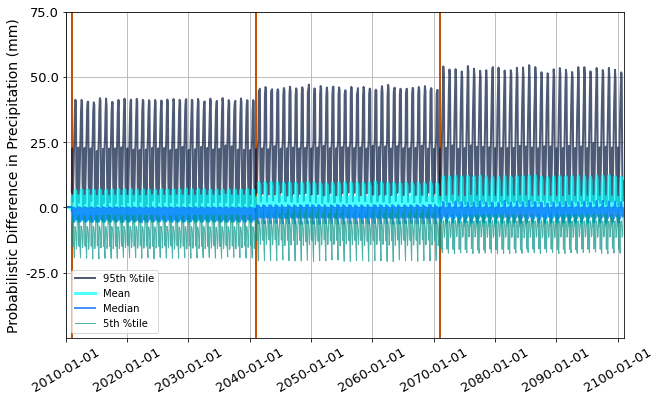

In [80]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinPrecip, MaxPrecip], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinPrecip, MaxPrecip], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinPrecip, MaxPrecip], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( S1PreStats1.index, S1PreStats1[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', label='95th %tile', alpha=alphVal )
ax11.plot( S1PreStats2.index, S1PreStats2[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax11.plot( S1PreStats3.index, S1PreStats3[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax11.plot( S1PreStats4.index, S1PreStats4[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax11.plot( S1PreStats1.index, S1PreStats1[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', label='Mean', alpha=alphVal )
ax11.plot( S1PreStats2.index, S1PreStats2[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax11.plot( S1PreStats3.index, S1PreStats3[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax11.plot( S1PreStats4.index, S1PreStats4[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax11.plot( S1PreStats1.index, S1PreStats1[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', label='Median', alpha=alphVal)
ax11.plot( S1PreStats2.index, S1PreStats2[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax11.plot( S1PreStats3.index, S1PreStats3[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax11.plot( S1PreStats4.index, S1PreStats4[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax11.plot( S1PreStats1.index, S1PreStats1[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:teal', label='5th %tile', alpha=alphVal )
ax11.plot( S1PreStats2.index, S1PreStats2[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:teal', alpha=alphVal )
ax11.plot( S1PreStats3.index, S1PreStats3[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:teal', alpha=alphVal )
ax11.plot( S1PreStats4.index, S1PreStats4[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:teal', alpha=alphVal )
ax11.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax11.set_yticks( preTicks )
ax11.set_ylim( (MinPrecip, MaxPrecip) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Probabilistic Difference in Precipitation (mm)', fontsize=14)
ax11.grid( b=True )
ax11.legend( loc='lower left' )
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.tick_params(axis='x', which='major', labelrotation=30.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )

Fouier smoothed

In [ ]:
#rft = np.fft.rfft( S1PreStats1[StatsHdsList[95]].to_numpy() )
#rft[SM_NUM:] = 0.0
#FF_Pre1_95 = np.fft.irfft(rft)
#rft = np.fft.rfft( S1PreStats2[StatsHdsList[95]].to_numpy() )
#rft[SM_NUM:] = 0.0
#FF_Pre2_95 = np.fft.irfft(rft)
#rft = np.fft.rfft( S1PreStats3[StatsHdsList[95]].to_numpy() )
#rft[SM_NUM:] = 0.0
#FF_Pre3_95 = np.fft.irfft(rft)
#rft = np.fft.rfft( S1PreStats4[StatsHdsList[95]].to_numpy() )
#rft[SM_NUM:] = 0.0
#FF_Pre4_95 = np.fft.irfft(rft)
#rft = np.fft.rfft( S1PreStats1[StatsHdsList[5]].to_numpy() )
#rft[SM_NUM:] = 0.0
#FF_Pre1_5 = np.fft.irfft(rft)
#rft = np.fft.rfft( S1PreStats2[StatsHdsList[5]].to_numpy() )
#rft[SM_NUM:] = 0.0
#FF_Pre2_5 = np.fft.irfft(rft)
#rft = np.fft.rfft( S1PreStats3[StatsHdsList[5]].to_numpy() )
#rft[SM_NUM:] = 0.0
#FF_Pre3_5 = np.fft.irfft(rft)
#rft = np.fft.rfft( S1PreStats4[StatsHdsList[5]].to_numpy() )
#rft[SM_NUM:] = 0.0
#FF_Pre4_5 = np.fft.irfft(rft)
#rft = np.fft.rfft( S1PreStats1[StatsHdsList[50]].to_numpy() )
#rft[SM_NUM:] = 0.0
#FF_Pre1_50 = np.fft.irfft(rft)
#rft = np.fft.rfft( S1PreStats2[StatsHdsList[50]].to_numpy() )
#rft[SM_NUM:] = 0.0
#FF_Pre2_50 = np.fft.irfft(rft)
#rft = np.fft.rfft( S1PreStats3[StatsHdsList[50]].to_numpy() )
#rft[SM_NUM:] = 0.0
#FF_Pre3_50 = np.fft.irfft(rft)
#rft = np.fft.rfft( S1PreStats4[StatsHdsList[50]].to_numpy() )
#rft[SM_NUM:] = 0.0
#FF_Pre4_50 = np.fft.irfft(rft)
#rft = np.fft.rfft( S1PreStats1[StatsHdsList[101]].to_numpy() )
#rft[SM_NUM:] = 0.0
#FF_Pre1_me = np.fft.irfft(rft)
#rft = np.fft.rfft( S1PreStats2[StatsHdsList[101]].to_numpy() )
#rft[SM_NUM:] = 0.0
#FF_Pre2_me = np.fft.irfft(rft)
#rft = np.fft.rfft( S1PreStats3[StatsHdsList[101]].to_numpy() )
#rft[SM_NUM:] = 0.0
#FF_Pre3_me = np.fft.irfft(rft)
#rft = np.fft.rfft( S1PreStats4[StatsHdsList[101]].to_numpy() )
#rft[SM_NUM:] = 0.0
#FF_Pre4_me = np.fft.irfft(rft)

Butterworth, low pass filter

In [81]:
wAr = S1PrecipDF[StatsHdsList[95]].to_numpy()
S1_Pre_95 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = S1PrecipDF[StatsHdsList[5]].to_numpy()
S1_Pre_05 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = S1PrecipDF[StatsHdsList[75]].to_numpy()
S1_Pre_75 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = S1PrecipDF[StatsHdsList[25]].to_numpy()
S1_Pre_25 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = S1PrecipDF[StatsHdsList[50]].to_numpy()
S1_Pre_Med = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = S1PrecipDF[StatsHdsList[101]].to_numpy()
S1_Pre_Ave = butter_lowpass_filter(wAr, CUTOFF, FS )

In [82]:
ForTimeList = list( S1PrecipDF.index.to_pydatetime() )
BackDTList = deepcopy( ForTimeList )
BackDTList = BackDTList[::-1]
DTTimeList = deepcopy( ForTimeList )
DTTimeList.extend( BackDTList )

In [83]:
S1_Precip_F90 = list( S1_Pre_05 )
BackDTList = list( S1_Pre_95 )
BackPre_95 = BackDTList[::-1]
S1_Precip_F90.extend( BackPre_95 )
S1_Precip_IQR = list( S1_Pre_25 )
BackDTList = list( S1_Pre_75 )
BackPre_75 = BackDTList[::-1]
S1_Precip_IQR.extend( BackPre_75 )

In [ ]:
#DTTL_2 = list( S1PreStats2.index.to_pydatetime() )
#DTTL_3 = list( S1PreStats3.index.to_pydatetime() )
#DTTL_4 = list( S1PreStats4.index.to_pydatetime() )
#BackDTList = deepcopy( DTTL_2 )
#BackDTTL_2 = BackDTList[::-1]
#BackDTList = deepcopy( DTTL_3 )
#BackDTTL_3 = BackDTList[::-1]
#BackDTList = deepcopy( DTTL_4 )
#BackDTTL_4 = BackDTList[::-1]
#DTTimeList = deepcopy( DTTL_2 )
#DTTimeList.extend( DTTL_3 )
#DTTimeList.extend( DTTL_4 )
#DTTimeList.extend( BackDTTL_4 )
#DTTimeList.extend( BackDTTL_3 )
#DTTimeList.extend( BackDTTL_2 )

In [ ]:
#Pre2_5 = list( FF_Pre2_5 )
#Pre3_5 = list( FF_Pre3_5 )
#Pre4_5 = list( FF_Pre4_5 )
#BackDTList = list( FF_Pre4_95 )
#BackPre4_95 = BackDTList[::-1]
#BackDTList = list( FF_Pre3_95 )
#BackPre3_95 = BackDTList[::-1]
#BackDTList = list( FF_Pre2_95 )
#BackPre2_95 = BackDTList[::-1]
#PreVals = deepcopy( Pre2_5 )
#PreVals.extend( Pre3_5 )
#PreVals.extend( Pre4_5 )
#PreVals.extend( BackPre4_95 )
#PreVals.extend( BackPre3_95 )
#PreVals.extend( BackPre2_95 )

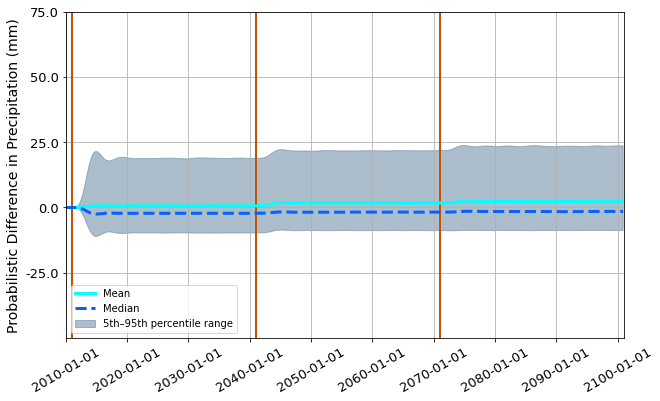

In [84]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinPrecip, MaxPrecip], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinPrecip, MaxPrecip], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinPrecip, MaxPrecip], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF = ax11.fill( DTTimeList, S1_Precip_F90, color='xkcd:steel blue', alpha=0.50, 
                 label="5th–95th percentile range")
ax11.plot( ForTimeList, S1_Pre_Ave, linestyle='-',
           linewidth=3, color='xkcd:cyan', label='Mean' )
ax11.plot( ForTimeList, S1_Pre_Med, linestyle='dashed',
           linewidth=3, color='xkcd:bright blue', label='Median' )
ax11.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax11.set_yticks( preTicks )
ax11.set_ylim( (MinPrecip, MaxPrecip) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Probabilistic Difference in Precipitation (mm)', fontsize=14)
ax11.grid( b=True )
ax11.legend( loc='lower left' )
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.tick_params(axis='x', which='major', labelrotation=30.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )

Continuous Precipitation

In [ ]:
GoodLen = len( ContPrecip )
GoodLen

In [ ]:
#wAr = ContPrecip[StatsHdsList[95]].to_numpy()
#wArEx = np.append( wAr, (wAr[GoodLen-3] * np.ones( int(1.5*GoodLen) ) ), )
#rft = np.fft.rfft( wArEx )
#rft[(2*SM_NUM):] = 0.0
#FF_CPr_95 = np.fft.irfft(rft)[:GoodLen]
#wAr = ContPrecip[StatsHdsList[5]].to_numpy()
#wArEx = np.append( wAr, (wAr[GoodLen-3] * np.ones( int(1.5*GoodLen) ) ), )
#rft = np.fft.rfft( wArEx )
#rft[(2*SM_NUM):] = 0.0
#FF_CPr_5 = np.fft.irfft(rft)[:GoodLen]
#wAr = ContPrecip[StatsHdsList[75]].to_numpy()
#wArEx = np.append( wAr, (wAr[GoodLen-3] * np.ones( int(1.5*GoodLen) ) ), )
#rft = np.fft.rfft( wArEx )
#rft[(2*SM_NUM):] = 0.0
#FF_CPr_75 = np.fft.irfft(rft)[:GoodLen]
#wAr = ContPrecip[StatsHdsList[25]].to_numpy()
#wArEx = np.append( wAr, (wAr[GoodLen-3] * np.ones( int(1.5*GoodLen) ) ), )
#rft = np.fft.rfft( wArEx )
#rft[(2*SM_NUM):] = 0.0
#FF_CPr_25 = np.fft.irfft(rft)[:GoodLen]
#wAr = ContPrecip[StatsHdsList[50]].to_numpy()
#wArEx = np.append( wAr, (wAr[GoodLen-3] * np.ones( int(1.5*GoodLen) ) ), )
#rft = np.fft.rfft( wArEx )
#rft[(2*SM_NUM):] = 0.0
#FF_CPr_50 = np.fft.irfft(rft)[:GoodLen]
#wAr = ContPrecip[StatsHdsList[101]].to_numpy()
#wArEx = np.append( wAr, (wAr[GoodLen-3] * np.ones( int(1.5*GoodLen) ) ), )
#rft = np.fft.rfft( wArEx )
#rft[(2*SM_NUM):] = 0.0
#FF_CPr_me = np.fft.irfft(rft)[:GoodLen]

In [ ]:
#DTTL = list( ContPrecip.index.to_pydatetime() )
#BackDTList = DTTL[::-1]
#DTTimeList = deepcopy( DTTL )
#DTTimeList.extend( BackDTList )

In [ ]:
#len( FF_CPr_50 )

In [ ]:
#CPr_5 = list( FF_CPr_5 )
#BackDTList = list( FF_CPr_95 )
#BackCPr_95 = BackDTList[::-1]
#CPrVals90 = deepcopy( CPr_5 )
#CPrVals90.extend( BackCPr_95 )

In [ ]:
#CPr_25 = list( FF_CPr_25 )
#BackDTList = list( FF_CPr_75 )
#BackCPr_75 = BackDTList[::-1]
#CPrVals50 = deepcopy( CPr_25 )
#CPrVals50.extend( BackCPr_75 )

In [124]:
MaxCPr = 50.0
MinCPr = -15.0

In [125]:
cprTicks = [ -10.0, 0.0, 10.0, 20.0, 30.0 ]

In [126]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Results_DeltaCPreBF_%s.svg" % SIM_ROOT ) )
OutSVG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Results_DeltaCPreBF_DC_WGMN4.svg'

In [127]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Results_DeltaCPreBF_%s.png" % SIM_ROOT ) )
OutPNG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Results_DeltaCPreBF_DC_WGMN4.png'

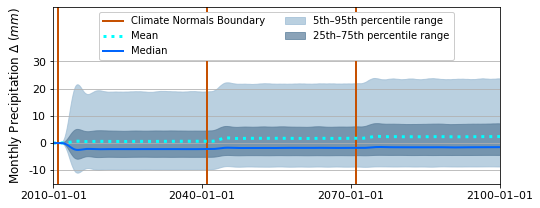

In [128]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 3.25)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinCPr, MaxCPr], linestyle='-',
           linewidth=2, color='xkcd:dark orange', label="Climate Normals Boundary")
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinCPr, MaxCPr], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinCPr, MaxCPr], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sF90 = ax11.fill( DTTimeList, S1_Precip_F90, color='xkcd:light grey blue', alpha=0.70, 
                  label="5th–95th percentile range")
sF50 = ax11.fill( DTTimeList, S1_Precip_IQR, color='xkcd:steel blue', alpha=0.70, 
                  label="25th–75th percentile range")
ax11.plot( ForTimeList, S1_Pre_Ave, linestyle=':',
           linewidth=3, color='xkcd:cyan', label='Mean' )
ax11.plot( ForTimeList, S1_Pre_Med, linestyle='-',
           linewidth=2, color='xkcd:bright blue', label='Median' )
ax11.set_xticks( [ dt.datetime(2010, 1, 1), dt.datetime(2040, 1, 1), dt.datetime(2070, 1, 1),
                  dt.datetime(2100, 1, 1) ] )
ax11.set_xlim( (dt.datetime(2010, 1, 1), dt.datetime(2100, 1, 1) ) )
ax11.set_yticks( cprTicks )
ax11.set_ylim( (MinCPr, MaxCPr) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Monthly Precipitation $\Delta$ ($mm$)', fontsize=12)
ax11.legend( loc='upper center', fontsize=10, ncol=2, framealpha=1.0 )
ax11.tick_params(axis='both', which='major', labelsize=11)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y–%m–%d") )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

In [134]:
MaxCPr = 50.0
MinCPr = -15.0

In [135]:
cprTicks = [ -10.0, 0.0, 10.0, 20.0 ]

In [136]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Results_DeltaPreBF_FRot_%s.svg" % SIM_ROOT ) )
OutSVG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Results_DeltaPreBF_FRot_DC_WGMN4.svg'

In [137]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Results_DeltaCPreBF_FRot_%s.png" % SIM_ROOT ) )
OutPNG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Results_DeltaCPreBF_FRot_DC_WGMN4.png'

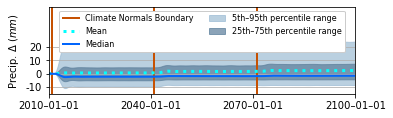

In [138]:
Fig1 = plt.figure()
Fig1.set_size_inches(5.5, 1.6)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinCPr, MaxCPr], linestyle='-',
           linewidth=2, color='xkcd:dark orange', label="Climate Normals Boundary")
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinCPr, MaxCPr], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinCPr, MaxCPr], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sF90 = ax11.fill( DTTimeList, S1_Precip_F90, color='xkcd:light grey blue', alpha=0.70, 
                  label="5th–95th percentile range")
sF50 = ax11.fill( DTTimeList, S1_Precip_IQR, color='xkcd:steel blue', alpha=0.70, 
                  label="25th–75th percentile range")
ax11.plot( ForTimeList, S1_Pre_Ave, linestyle=':',
           linewidth=3, color='xkcd:cyan', label='Mean' )
ax11.plot( ForTimeList, S1_Pre_Med, linestyle='-',
           linewidth=2, color='xkcd:bright blue', label='Median' )
ax11.set_xticks( [ dt.datetime(2010, 1, 1), dt.datetime(2040, 1, 1), dt.datetime(2070, 1, 1),
                  dt.datetime(2100, 1, 1) ] )
ax11.set_xlim( (dt.datetime(2010, 1, 1), dt.datetime(2100, 1, 1) ) )
ax11.set_yticks( cprTicks )
ax11.set_ylim( (MinCPr, MaxCPr) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Precip. $\Delta$ ($mm$)', fontsize=10)
ax11.legend( loc='upper center', fontsize=8, ncol=2, framealpha=1.0 )
ax11.tick_params(axis='both', which='major', labelsize=10)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y–%m–%d") )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

### PET

In [95]:
S1MaxPET, S1MinPET

(29.39640398060089, 0)

In [96]:
MaxPET = 30.0
MinPET = -10.0

In [97]:
petTicks = [ 0.0, 10.0, 20.0, 30.0 ]

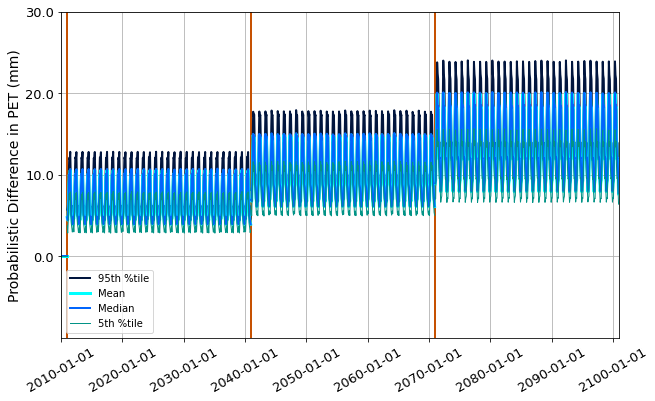

In [98]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinPET, MaxPET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinPET, MaxPET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinPET, MaxPET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( S1PETStats1.index, S1PETStats1[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', label='95th %tile')
ax11.plot( S1PETStats2.index, S1PETStats2[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy' )
ax11.plot( S1PETStats3.index, S1PETStats3[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy' )
ax11.plot( S1PETStats4.index, S1PETStats4[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy' )
ax11.plot( S1PETStats1.index, S1PETStats1[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', label='Mean' )
ax11.plot( S1PETStats2.index, S1PETStats2[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( S1PETStats3.index, S1PETStats3[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( S1PETStats4.index, S1PETStats4[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( S1PETStats1.index, S1PETStats1[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', label='Median')
ax11.plot( S1PETStats2.index, S1PETStats2[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.plot( S1PETStats3.index, S1PETStats3[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.plot( S1PETStats4.index, S1PETStats4[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.plot( S1PETStats1.index, S1PETStats1[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:teal', label='5th %tile' )
ax11.plot( S1PETStats2.index, S1PETStats2[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:teal' )
ax11.plot( S1PETStats3.index, S1PETStats3[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:teal' )
ax11.plot( S1PETStats4.index, S1PETStats4[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:teal' )
ax11.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax11.set_yticks( petTicks )
ax11.set_ylim( (MinPET, MaxPET) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Probabilistic Difference in PET (mm)', fontsize=14)
ax11.grid( b=True )
ax11.legend( loc='lower left' )
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.tick_params(axis='x', which='major', labelrotation=30.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )

Butterworth, low pass filter

In [99]:
wAr = ContPET[StatsHdsList[95]].to_numpy()
S1_PET_95 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = ContPET[StatsHdsList[5]].to_numpy()
S1_PET_05 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = ContPET[StatsHdsList[75]].to_numpy()
S1_PET_75 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = ContPET[StatsHdsList[25]].to_numpy()
S1_PET_25 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = ContPET[StatsHdsList[50]].to_numpy()
S1_PET_Med = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = ContPET[StatsHdsList[101]].to_numpy()
S1_PET_Ave = butter_lowpass_filter(wAr, CUTOFF, FS )

In [100]:
S1_PET_F90 = list( S1_PET_05 )
BackDTList = list( S1_PET_95 )
BackPET_95 = BackDTList[::-1]
S1_PET_F90.extend( BackPET_95 )
S1_PET_IQR = list( S1_PET_25 )
BackDTList = list( S1_PET_75 )
BackPET_75 = BackDTList[::-1]
S1_PET_IQR.extend( BackPET_75 )

In [ ]:
#rft = np.fft.rfft( S1PETStats1[StatsHdsList[95]].to_numpy() )
#rft[SM_NUM:] = 0.0
#FF_PET1_95 = np.fft.irfft(rft)
#rft = np.fft.rfft( S1PETStats2[StatsHdsList[95]].to_numpy() )
#rft[SM_NUM:] = 0.0
#FF_PET2_95 = np.fft.irfft(rft)
#rft = np.fft.rfft( S1PETStats3[StatsHdsList[95]].to_numpy() )
#rft[SM_NUM:] = 0.0
#FF_PET3_95 = np.fft.irfft(rft)
#rft = np.fft.rfft( S1PETStats4[StatsHdsList[95]].to_numpy() )
#rft[SM_NUM:] = 0.0
#FF_PET4_95 = np.fft.irfft(rft)
#rft = np.fft.rfft( S1PETStats1[StatsHdsList[5]].to_numpy() )
#rft[SM_NUM:] = 0.0
#FF_PET1_5 = np.fft.irfft(rft)
#rft = np.fft.rfft( S1PETStats2[StatsHdsList[5]].to_numpy() )
#rft[SM_NUM:] = 0.0
#FF_PET2_5 = np.fft.irfft(rft)
#rft = np.fft.rfft( S1PETStats3[StatsHdsList[5]].to_numpy() )
#rft[SM_NUM:] = 0.0
#FF_PET3_5 = np.fft.irfft(rft)
#rft = np.fft.rfft( S1PETStats4[StatsHdsList[5]].to_numpy() )
#rft[SM_NUM:] = 0.0
#FF_PET4_5 = np.fft.irfft(rft)
#rft = np.fft.rfft( S1PETStats1[StatsHdsList[50]].to_numpy() )
#rft[SM_NUM:] = 0.0
#FF_PET1_50 = np.fft.irfft(rft)
#rft = np.fft.rfft( S1PETStats2[StatsHdsList[50]].to_numpy() )
#rft[SM_NUM:] = 0.0
#FF_PET2_50 = np.fft.irfft(rft)
#rft = np.fft.rfft( S1PETStats3[StatsHdsList[50]].to_numpy() )
#rft[SM_NUM:] = 0.0
#FF_PET3_50 = np.fft.irfft(rft)
#rft = np.fft.rfft( S1PETStats4[StatsHdsList[50]].to_numpy() )
#rft[SM_NUM:] = 0.0
#FF_PET4_50 = np.fft.irfft(rft)
#rft = np.fft.rfft( S1PETStats1[StatsHdsList[101]].to_numpy() )
#rft[SM_NUM:] = 0.0
#FF_PET1_me = np.fft.irfft(rft)
#rft = np.fft.rfft( S1PETStats2[StatsHdsList[101]].to_numpy() )
#rft[SM_NUM:] = 0.0
#FF_PET2_me = np.fft.irfft(rft)
#rft = np.fft.rfft( S1PETStats3[StatsHdsList[101]].to_numpy() )
#rft[SM_NUM:] = 0.0
#FF_PET3_me = np.fft.irfft(rft)
#rft = np.fft.rfft( S1PETStats4[StatsHdsList[101]].to_numpy() )
#rft[SM_NUM:] = 0.0
#FF_PET4_me = np.fft.irfft(rft)

In [ ]:
#PET2_5 = list( FF_PET2_5 )
#PET3_5 = list( FF_PET3_5 )
#PET4_5 = list( FF_PET4_5 )
#BackDTList = list( FF_PET4_95 )
#BackPET4_95 = BackDTList[::-1]
#BackDTList = list( FF_PET3_95 )
#BackPET3_95 = BackDTList[::-1]
#BackDTList = list( FF_PET2_95 )
#BackPET2_95 = BackDTList[::-1]
#PETVals = deepcopy( PET2_5 )
#PETVals.extend( PET3_5 )
#PETVals.extend( PET4_5 )
#PETVals.extend( BackPET4_95 )
#PETVals.extend( BackPET3_95 )
#PETVals.extend( BackPET2_95 )

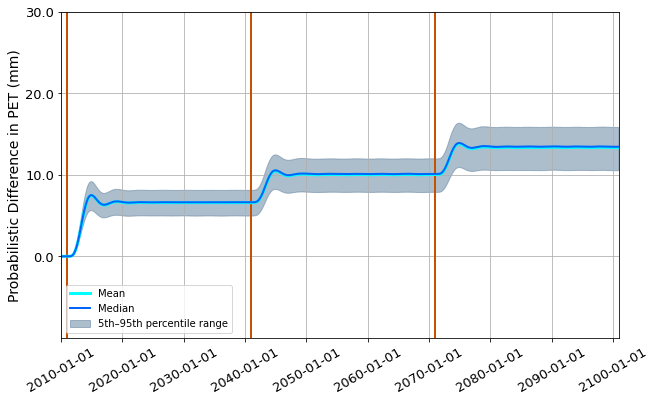

In [101]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinPET, MaxPET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinPET, MaxPET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinPET, MaxPET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF = ax11.fill( DTTimeList, S1_PET_F90, color='xkcd:steel blue', alpha=0.50, 
                 label="5th–95th percentile range")
ax11.plot( ForTimeList, S1_PET_Ave, linestyle='-',
           linewidth=3, label='Mean', color='xkcd:cyan' )
ax11.plot( ForTimeList, S1_PET_Med, linestyle='-',
           linewidth=2, label='Median', color='xkcd:bright blue' )
ax11.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax11.set_yticks( petTicks )
ax11.set_ylim( (MinPET, MaxPET) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Probabilistic Difference in PET (mm)', fontsize=14)
ax11.grid( b=True )
ax11.legend( loc='lower left' )
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.tick_params(axis='x', which='major', labelrotation=30.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )

Continuous PET

In [ ]:
GoodLen = len( ContPET )
GoodLen

In [ ]:
#wAr = ContPET[StatsHdsList[95]].to_numpy()
#wArEx = np.append( wAr, (wAr[GoodLen-5] * np.ones( int(1.0*GoodLen) ) ), )
#rft = np.fft.rfft( wArEx )
#rft[(2*SM_NUM):] = 0.0
#FF_CPET_95 = np.fft.irfft(rft)[:GoodLen]
#wAr = ContPET[StatsHdsList[5]].to_numpy()
#wArEx = np.append( wAr, (wAr[GoodLen-5] * np.ones( int(1.0*GoodLen) ) ), )
#rft = np.fft.rfft( wArEx )
#rft[(2*SM_NUM):] = 0.0
#FF_CPET_5 = np.fft.irfft(rft)[:GoodLen]
#wAr = ContPET[StatsHdsList[75]].to_numpy()
#wArEx = np.append( wAr, (wAr[GoodLen-5] * np.ones( int(1.0*GoodLen) ) ), )
#rft = np.fft.rfft( wArEx )
#rft[(2*SM_NUM):] = 0.0
#FF_CPET_75 = np.fft.irfft(rft)[:GoodLen]
#wAr = ContPET[StatsHdsList[25]].to_numpy()
#wArEx = np.append( wAr, (wAr[GoodLen-5] * np.ones( int(1.0*GoodLen) ) ), )
#rft = np.fft.rfft( wArEx )
#rft[(2*SM_NUM):] = 0.0
#FF_CPET_25 = np.fft.irfft(rft)[:GoodLen]
#wAr = ContPET[StatsHdsList[50]].to_numpy()
#wArEx = np.append( wAr, (wAr[GoodLen-5] * np.ones( int(1.0*GoodLen) ) ), )
#rft = np.fft.rfft( wArEx )
#rft[(2*SM_NUM):] = 0.0
#FF_CPET_50 = np.fft.irfft(rft)[:GoodLen]
#wAr = ContPET[StatsHdsList[101]].to_numpy()
#wArEx = np.append( wAr, (wAr[GoodLen-5] * np.ones( int(1.0*GoodLen) ) ), )
#rft = np.fft.rfft( wArEx )
#rft[(2*SM_NUM):] = 0.0
#FF_CPET_me = np.fft.irfft(rft)[:GoodLen]

In [ ]:
#DTTL = list( ContPET.index.to_pydatetime() )
#BackDTList = DTTL[::-1]
#DTTimeList = deepcopy( DTTL )
#DTTimeList.extend( BackDTList )

In [ ]:
#len( FF_CPET_50 )

In [ ]:
#CPET_5 = list( FF_CPET_5 )
#BackDTList = list( FF_CPET_95 )
#BackCPET_95 = BackDTList[::-1]
#CPETVals90 = deepcopy( CPET_5 )
#CPETVals90.extend( BackCPET_95 )

In [ ]:
#CPET_25 = list( FF_CPET_25 )
#BackDTList = list( FF_CPET_75 )
#BackCPET_75 = BackDTList[::-1]
#CPETVals50 = deepcopy( CPET_25 )
#CPETVals50.extend( BackCPET_75 )

In [107]:
MaxCPET = 50.0
MinCPET = -15.0

In [108]:
CPETTicks = [ -10.0, 0.0, 10.0, 20.0, 30.0 ]

In [109]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Results_DeltaCPETBF_%s.svg" % SIM_ROOT ) )
OutSVG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Results_DeltaCPETBF_DC_WGMN4.svg'

In [110]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Results_DeltaCPETBF_%s.png" % SIM_ROOT ) )
OutPNG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Results_DeltaCPETBF_DC_WGMN4.png'

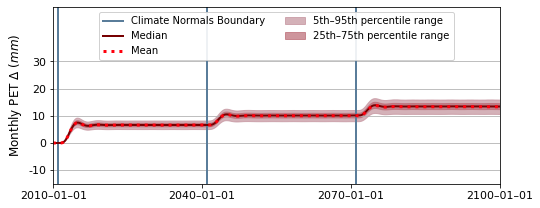

In [111]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 3.25)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinCPET, MaxCPET], linestyle='-',
           linewidth=2, color='xkcd:steel blue', label="Climate Normals Boundary")
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinCPET, MaxCPET], linestyle='-',
           linewidth=2, color='xkcd:steel blue' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinCPET, MaxCPET], linestyle='-',
           linewidth=2, color='xkcd:steel blue' )
sF90 = ax11.fill( DTTimeList, S1_PET_F90, color='xkcd:grey pink', alpha=0.70, 
                  label="5th–95th percentile range")
sF50 = ax11.fill( DTTimeList, S1_PET_IQR, color='xkcd:dusky rose', alpha=0.70, 
                  label="25th–75th percentile range")
ax11.plot( ContPET.index, S1_PET_Med, linestyle='-',
           linewidth=2, color='xkcd:blood', label='Median' )
ax11.plot( ContPET.index, S1_PET_Ave, linestyle=':',
           linewidth=3, color='xkcd:bright red', label='Mean' )
ax11.set_xticks( [ dt.datetime(2010, 1, 1), dt.datetime(2040, 1, 1), dt.datetime(2070, 1, 1),
                  dt.datetime(2100, 1, 1) ] )
ax11.set_xlim( (dt.datetime(2010, 1, 1), dt.datetime(2100, 1, 1) ) )
ax11.set_yticks( CPETTicks )
ax11.set_ylim( (MinCPET, MaxCPET) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Monthly PET $\Delta$ ($mm$)', fontsize=12)
ax11.legend( loc='upper center', fontsize=10, ncol=2, framealpha=0.9 )
ax11.tick_params(axis='both', which='major', labelsize=11)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y–%m–%d") )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

In [119]:
MaxCPET = 20.0
MinCPET = -20.0

In [120]:
CPETTicks = [ 0.0, 10.0, 20.0 ]

In [121]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Results_DeltaPETBF_FRot_%s.svg" % SIM_ROOT ) )
OutSVG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Results_DeltaPETBF_FRot_DC_WGMN4.svg'

In [122]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Results_DeltaPETBF_FRot_%s.png" % SIM_ROOT ) )
OutPNG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Results_DeltaPETBF_FRot_DC_WGMN4.png'

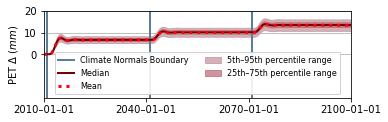

In [123]:
Fig1 = plt.figure()
Fig1.set_size_inches(5.5, 1.6)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinCPET, MaxCPET], linestyle='-',
           linewidth=2, color='xkcd:steel blue', label="Climate Normals Boundary")
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinCPET, MaxCPET], linestyle='-',
           linewidth=2, color='xkcd:steel blue' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinCPET, MaxCPET], linestyle='-',
           linewidth=2, color='xkcd:steel blue' )
sF90 = ax11.fill( DTTimeList, S1_PET_F90, color='xkcd:grey pink', alpha=0.70, 
                  label="5th–95th percentile range")
sF50 = ax11.fill( DTTimeList, S1_PET_IQR, color='xkcd:dusky rose', alpha=0.70, 
                  label="25th–75th percentile range")
ax11.plot( ContPET.index, S1_PET_Med, linestyle='-',
           linewidth=2, color='xkcd:blood', label='Median' )
ax11.plot( ContPET.index, S1_PET_Ave, linestyle=':',
           linewidth=3, color='xkcd:bright red', label='Mean' )
ax11.set_xticks( [ dt.datetime(2010, 1, 1), dt.datetime(2040, 1, 1), dt.datetime(2070, 1, 1),
                  dt.datetime(2100, 1, 1) ] )
ax11.set_xlim( (dt.datetime(2010, 1, 1), dt.datetime(2100, 1, 1) ) )
ax11.set_yticks( CPETTicks )
ax11.set_ylim( (MinCPET, MaxCPET) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('PET $\Delta$ ($mm$)', fontsize=10)
ax11.legend( loc='lower center', fontsize=8, ncol=2, framealpha=0.9 )
ax11.tick_params(axis='both', which='major', labelsize=10)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y–%m–%d") )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

### AET

In [ ]:
S1MaxAET, S1MinAET

In [ ]:
MaxAET = 50.0
MinAET = -50.0

In [ ]:
aetTicks = [ -25.0, 0.0, 10.0, 25.0, 50.0 ]

In [ ]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinAET, MaxAET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinAET, MaxAET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinAET, MaxAET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( S1AETStats1.index, S1AETStats1[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', label='95th %tile')
ax11.plot( S1AETStats2.index, S1AETStats2[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy' )
ax11.plot( S1AETStats3.index, S1AETStats3[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy' )
ax11.plot( S1AETStats4.index, S1AETStats4[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy' )
ax11.plot( S1AETStats1.index, S1AETStats1[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', label='Mean' )
ax11.plot( S1AETStats2.index, S1AETStats2[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( S1AETStats3.index, S1AETStats3[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( S1AETStats4.index, S1AETStats4[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( S1AETStats1.index, S1AETStats1[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', label='Median')
ax11.plot( S1AETStats2.index, S1AETStats2[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.plot( S1AETStats3.index, S1AETStats3[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.plot( S1AETStats4.index, S1AETStats4[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.plot( S1AETStats1.index, S1AETStats1[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:teal', label='5th %tile' )
ax11.plot( S1AETStats2.index, S1AETStats2[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:teal' )
ax11.plot( S1AETStats3.index, S1AETStats3[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:teal' )
ax11.plot( S1AETStats4.index, S1AETStats4[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:teal' )
ax11.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax11.set_yticks( aetTicks )
ax11.set_ylim( (MinAET, MaxAET) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Probabilistic Difference in AET (mm)', fontsize=14)
ax11.grid( b=True )
ax11.legend( loc='lower left' )
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.tick_params(axis='x', which='major', labelrotation=30.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )

In [ ]:
rft = np.fft.rfft( S1AETStats1[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_AET1_95 = np.fft.irfft(rft)
rft = np.fft.rfft( S1AETStats2[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_AET2_95 = np.fft.irfft(rft)
rft = np.fft.rfft( S1AETStats3[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_AET3_95 = np.fft.irfft(rft)
rft = np.fft.rfft( S1AETStats4[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_AET4_95 = np.fft.irfft(rft)
rft = np.fft.rfft( S1AETStats1[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_AET1_5 = np.fft.irfft(rft)
rft = np.fft.rfft( S1AETStats2[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_AET2_5 = np.fft.irfft(rft)
rft = np.fft.rfft( S1AETStats3[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_AET3_5 = np.fft.irfft(rft)
rft = np.fft.rfft( S1AETStats4[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_AET4_5 = np.fft.irfft(rft)
rft = np.fft.rfft( S1AETStats1[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_AET1_50 = np.fft.irfft(rft)
rft = np.fft.rfft( S1AETStats2[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_AET2_50 = np.fft.irfft(rft)
rft = np.fft.rfft( S1AETStats3[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_AET3_50 = np.fft.irfft(rft)
rft = np.fft.rfft( S1AETStats4[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_AET4_50 = np.fft.irfft(rft)
rft = np.fft.rfft( S1AETStats1[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_AET1_me = np.fft.irfft(rft)
rft = np.fft.rfft( S1AETStats2[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_AET2_me = np.fft.irfft(rft)
rft = np.fft.rfft( S1AETStats3[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_AET3_me = np.fft.irfft(rft)
rft = np.fft.rfft( S1AETStats4[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_AET4_me = np.fft.irfft(rft)

In [ ]:
AET2_5 = list( FF_AET2_5 )
AET3_5 = list( FF_AET3_5 )
AET4_5 = list( FF_AET4_5 )
BackDTList = list( FF_AET4_95 )
BackAET4_95 = BackDTList[::-1]
BackDTList = list( FF_AET3_95 )
BackAET3_95 = BackDTList[::-1]
BackDTList = list( FF_AET2_95 )
BackAET2_95 = BackDTList[::-1]
AETVals = deepcopy( AET2_5 )
AETVals.extend( AET3_5 )
AETVals.extend( AET4_5 )
AETVals.extend( BackAET4_95 )
AETVals.extend( BackAET3_95 )
AETVals.extend( BackAET2_95 )

In [ ]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinAET, MaxAET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinAET, MaxAET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinAET, MaxAET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF = ax11.fill( DTTimeList, AETVals, color='xkcd:steel blue', alpha=0.50, 
                 label="Fourier Smoothed 90% Confidence Interval")
ax11.plot( S1AETStats2.index, FF_AET2_me, linestyle='-',
           linewidth=3, color='xkcd:cyan', label='Mean' )
ax11.plot( S1AETStats3.index, FF_AET3_me, linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( S1AETStats4.index, FF_AET4_me, linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( S1AETStats2.index, FF_AET2_50, linestyle='-',
           linewidth=2, color='xkcd:bright blue', label='Median' )
ax11.plot( S1AETStats3.index, FF_AET3_50, linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.plot( S1AETStats4.index, FF_AET4_50, linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax11.set_yticks( aetTicks )
ax11.set_ylim( (MinAET, MaxAET) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Probabilistic Difference in AET (mm)', fontsize=14)
ax11.grid( b=True )
ax11.legend( loc='lower left' )
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.tick_params(axis='x', which='major', labelrotation=30.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )

Continuous AET

In [ ]:
GoodLen = len( ContAET )
GoodLen

In [ ]:
wAr = ContAET[StatsHdsList[95]].to_numpy()
wArEx = np.append( wAr, (wAr[GoodLen-3] * np.ones( int(1.0*GoodLen) ) ), )
rft = np.fft.rfft( wArEx )
rft[(2*SM_NUM):] = 0.0
FF_CAET_95 = np.fft.irfft(rft)[:GoodLen]
wAr = ContAET[StatsHdsList[5]].to_numpy()
wArEx = np.append( wAr, (wAr[GoodLen-3] * np.ones( int(1.0*GoodLen) ) ), )
rft = np.fft.rfft( wArEx )
rft[(2*SM_NUM):] = 0.0
FF_CAET_5 = np.fft.irfft(rft)[:GoodLen]
wAr = ContAET[StatsHdsList[75]].to_numpy()
wArEx = np.append( wAr, (wAr[GoodLen-3] * np.ones( int(1.0*GoodLen) ) ), )
rft = np.fft.rfft( wArEx )
rft[(2*SM_NUM):] = 0.0
FF_CAET_75 = np.fft.irfft(rft)[:GoodLen]
wAr = ContAET[StatsHdsList[25]].to_numpy()
wArEx = np.append( wAr, (wAr[GoodLen-3] * np.ones( int(1.0*GoodLen) ) ), )
rft = np.fft.rfft( wArEx )
rft[(2*SM_NUM):] = 0.0
FF_CAET_25 = np.fft.irfft(rft)[:GoodLen]
wAr = ContAET[StatsHdsList[50]].to_numpy()
wArEx = np.append( wAr, (wAr[GoodLen-3] * np.ones( int(1.0*GoodLen) ) ), )
rft = np.fft.rfft( wArEx )
rft[(2*SM_NUM):] = 0.0
FF_CAET_50 = np.fft.irfft(rft)[:GoodLen]
wAr = ContAET[StatsHdsList[101]].to_numpy()
wArEx = np.append( wAr, (wAr[GoodLen-3] * np.ones( int(1.0*GoodLen) ) ), )
rft = np.fft.rfft( wArEx )
rft[(2*SM_NUM):] = 0.0
FF_CAET_me = np.fft.irfft(rft)[:GoodLen]

In [ ]:
DTTL = list( ContAET.index.to_pydatetime() )
BackDTList = DTTL[::-1]
DTTimeList = deepcopy( DTTL )
DTTimeList.extend( BackDTList )

In [ ]:
len( FF_CAET_50 )

In [ ]:
CAET_5 = list( FF_CAET_5 )
BackDTList = list( FF_CAET_95 )
BackCAET_95 = BackDTList[::-1]
CAETVals90 = deepcopy( CAET_5 )
CAETVals90.extend( BackCAET_95 )

In [ ]:
CAET_25 = list( FF_CAET_25 )
BackDTList = list( FF_CAET_75 )
BackCAET_75 = BackDTList[::-1]
CAETVals50 = deepcopy( CAET_25 )
CAETVals50.extend( BackCAET_75 )

In [ ]:
MaxCAET = 25.0
MinCAET = -25.0

In [ ]:
CAETTicks = [ -20.0, -10.0, 0.0, 10.0, 20.0 ]

In [ ]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Results_DeltaCAET_%s.svg" % SIM_ROOT ) )
OutSVG

In [ ]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Results_DeltaCAET_%s.png" % SIM_ROOT ) )
OutPNG

In [ ]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.5, 6.5)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinCPr, MaxCPr], linestyle='-',
           linewidth=2, color='xkcd:dark grey', label="Climate Normals Boundary")
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinCPr, MaxCPr], linestyle='-',
           linewidth=2, color='xkcd:dark grey' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinCPr, MaxCPr], linestyle='-',
           linewidth=2, color='xkcd:dark grey' )
sF90 = ax11.fill( DTTimeList, CAETVals90, color='xkcd:light orange', alpha=0.70, 
                  label="5th to 95th percentile range" )
sF50 = ax11.fill( DTTimeList, CAETVals50, color='xkcd:faded orange', alpha=0.70, 
                  label="25th to 75th percentile range" )
ax11.plot( ContAET.index, FF_CAET_50, linestyle='-',
           linewidth=2, color='xkcd:burnt orange', label='Median' )
ax11.plot( ContAET.index, FF_CAET_me, linestyle=':',
           linewidth=3, color='xkcd:blood orange', label='Mean' )
ax11.set_xlim( (dt.datetime(2010, 1, 1), dt.datetime(2100, 1, 1) ) )
#ax11.set_yticks( CAETTicks )
ax11.set_yticks( cprTicks )
#ax11.set_ylim( (MinCAET, MaxCAET) )
ax11.set_ylim( (MinCPr, MaxCPr) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Monthly AET $\Delta$ ($mm$)', fontsize=14)
ax11.grid( b=True )
ax11.legend( loc='upper center', fontsize=12, ncol=2, framealpha=0.9 )
ax11.tick_params(axis='both', which='major', labelsize=12)
ax11.tick_params(axis='x', which='major', labelrotation=30.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

### Runoff (RO)

In [ ]:
S1MaxRO, S1MinRO

In [ ]:
MaxRO = 3.0
MinRO = -2.0

In [ ]:
roTicks = [ -1.0, 0.0, 1.0, 2.0, 3.0 ]

In [ ]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinRO, MaxRO], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinRO, MaxRO], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinRO, MaxRO], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( S1ROStats1.index, S1ROStats1[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', label='95th %tile')
ax11.plot( S1ROStats2.index, S1ROStats2[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy' )
ax11.plot( S1ROStats3.index, S1ROStats3[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy' )
ax11.plot( S1ROStats4.index, S1ROStats4[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy' )
ax11.plot( S1ROStats1.index, S1ROStats1[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', label='Mean' )
ax11.plot( S1ROStats2.index, S1ROStats2[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( S1ROStats3.index, S1ROStats3[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( S1ROStats4.index, S1ROStats4[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( S1ROStats1.index, S1ROStats1[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', label='Median')
ax11.plot( S1ROStats2.index, S1ROStats2[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.plot( S1ROStats3.index, S1ROStats3[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.plot( S1ROStats4.index, S1ROStats4[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.plot( S1ROStats1.index, S1ROStats1[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:teal', label='5th %tile' )
ax11.plot( S1ROStats2.index, S1ROStats2[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:teal' )
ax11.plot( S1ROStats3.index, S1ROStats3[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:teal' )
ax11.plot( S1ROStats4.index, S1ROStats4[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:teal' )
ax11.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax11.set_yticks( roTicks )
ax11.set_ylim( (MinRO, MaxRO) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Probabilistic Difference in Runoff (RO) (mm)', fontsize=14)
ax11.grid( b=True )
ax11.legend( loc='lower left' )
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.tick_params(axis='x', which='major', labelrotation=30.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )

In [ ]:
rft = np.fft.rfft( S1ROStats1[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RO1_95 = np.fft.irfft(rft)
rft = np.fft.rfft( S1ROStats2[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RO2_95 = np.fft.irfft(rft)
rft = np.fft.rfft( S1ROStats3[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RO3_95 = np.fft.irfft(rft)
rft = np.fft.rfft( S1ROStats4[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RO4_95 = np.fft.irfft(rft)
rft = np.fft.rfft( S1ROStats1[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RO1_5 = np.fft.irfft(rft)
rft = np.fft.rfft( S1ROStats2[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RO2_5 = np.fft.irfft(rft)
rft = np.fft.rfft( S1ROStats3[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RO3_5 = np.fft.irfft(rft)
rft = np.fft.rfft( S1ROStats4[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RO4_5 = np.fft.irfft(rft)
rft = np.fft.rfft( S1ROStats1[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RO1_50 = np.fft.irfft(rft)
rft = np.fft.rfft( S1ROStats2[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RO2_50 = np.fft.irfft(rft)
rft = np.fft.rfft( S1ROStats3[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RO3_50 = np.fft.irfft(rft)
rft = np.fft.rfft( S1ROStats4[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RO4_50 = np.fft.irfft(rft)
rft = np.fft.rfft( S1ROStats1[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RO1_me = np.fft.irfft(rft)
rft = np.fft.rfft( S1ROStats2[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RO2_me = np.fft.irfft(rft)
rft = np.fft.rfft( S1ROStats3[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RO3_me = np.fft.irfft(rft)
rft = np.fft.rfft( S1ROStats4[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RO4_me = np.fft.irfft(rft)

In [ ]:
RO2_5 = list( FF_RO2_5 )
RO3_5 = list( FF_RO3_5 )
RO4_5 = list( FF_RO4_5 )
BackDTList = list( FF_RO4_95 )
BackRO4_95 = BackDTList[::-1]
BackDTList = list( FF_RO3_95 )
BackRO3_95 = BackDTList[::-1]
BackDTList = list( FF_RO2_95 )
BackRO2_95 = BackDTList[::-1]
ROVals = deepcopy( RO2_5 )
ROVals.extend( RO3_5 )
ROVals.extend( RO4_5 )
ROVals.extend( BackRO4_95 )
ROVals.extend( BackRO3_95 )
ROVals.extend( BackRO2_95 )

In [ ]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinRO, MaxRO], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinRO, MaxRO], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinRO, MaxRO], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF = ax11.fill( DTTimeList, ROVals, color='xkcd:steel blue', alpha=0.50, 
                 label="Fourier Smoothed 90% Confidence Interval")
ax11.plot( S1ROStats2.index, FF_RO2_me, linestyle='-',
           linewidth=3, color='xkcd:cyan', label='Mean' )
ax11.plot( S1ROStats3.index, FF_RO3_me, linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( S1ROStats4.index, FF_RO4_me, linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( S1ROStats2.index, FF_RO2_50, linestyle='-',
           linewidth=2, color='xkcd:bright blue', label='Median' )
ax11.plot( S1ROStats3.index, FF_RO3_50, linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.plot( S1ROStats4.index, FF_RO4_50, linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax11.set_yticks( roTicks )
ax11.set_ylim( (MinRO, MaxRO) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Probabilistic Difference in Runoff (RO) (mm)', fontsize=14)
ax11.grid( b=True )
ax11.legend( loc='lower left' )
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.tick_params(axis='x', which='major', labelrotation=30.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )

### Recharge (Re)

In [ ]:
S1MaxRE, S1MinRE

In [ ]:
MaxRE = 4.0
MinRE = -3.0

In [ ]:
reTicks = [ -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0 ]

In [ ]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinRE, MaxRE], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinRE, MaxRE], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinRE, MaxRE], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( S1REStats1.index, S1REStats1[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', label='95th %tile')
ax11.plot( S1REStats2.index, S1REStats2[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy' )
ax11.plot( S1REStats3.index, S1REStats3[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy' )
ax11.plot( S1REStats4.index, S1REStats4[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy' )
ax11.plot( S1REStats1.index, S1REStats1[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', label='Mean' )
ax11.plot( S1REStats2.index, S1REStats2[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( S1REStats3.index, S1REStats3[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( S1REStats4.index, S1REStats4[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( S1REStats1.index, S1REStats1[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', label='Median')
ax11.plot( S1REStats2.index, S1REStats2[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.plot( S1REStats3.index, S1REStats3[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.plot( S1REStats4.index, S1REStats4[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.plot( S1REStats1.index, S1REStats1[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:teal', label='5th %tile' )
ax11.plot( S1REStats2.index, S1REStats2[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:teal' )
ax11.plot( S1REStats3.index, S1REStats3[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:teal' )
ax11.plot( S1REStats4.index, S1REStats4[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:teal' )
ax11.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax11.set_yticks( reTicks )
ax11.set_ylim( (MinRE, MaxRE) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Probabilistic Difference in Recharge (Re) (mm)', fontsize=14)
ax11.grid( b=True )
ax11.legend( loc='lower left' )
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.tick_params(axis='x', which='major', labelrotation=30.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )

In [ ]:
rft = np.fft.rfft( S1REStats1[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RE1_95 = np.fft.irfft(rft)
rft = np.fft.rfft( S1REStats2[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RE2_95 = np.fft.irfft(rft)
rft = np.fft.rfft( S1REStats3[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RE3_95 = np.fft.irfft(rft)
rft = np.fft.rfft( S1REStats4[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RE4_95 = np.fft.irfft(rft)
rft = np.fft.rfft( S1REStats1[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RE1_5 = np.fft.irfft(rft)
rft = np.fft.rfft( S1REStats2[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RE2_5 = np.fft.irfft(rft)
rft = np.fft.rfft( S1REStats3[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RE3_5 = np.fft.irfft(rft)
rft = np.fft.rfft( S1REStats4[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RE4_5 = np.fft.irfft(rft)
rft = np.fft.rfft( S1REStats1[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RE1_50 = np.fft.irfft(rft)
rft = np.fft.rfft( S1REStats2[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RE2_50 = np.fft.irfft(rft)
rft = np.fft.rfft( S1REStats3[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RE3_50 = np.fft.irfft(rft)
rft = np.fft.rfft( S1REStats4[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RE4_50 = np.fft.irfft(rft)
rft = np.fft.rfft( S1REStats1[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RE1_me = np.fft.irfft(rft)
rft = np.fft.rfft( S1REStats2[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RE2_me = np.fft.irfft(rft)
rft = np.fft.rfft( S1REStats3[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RE3_me = np.fft.irfft(rft)
rft = np.fft.rfft( S1REStats4[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RE4_me = np.fft.irfft(rft)

In [ ]:
RE2_5 = list( FF_RE2_5 )
RE3_5 = list( FF_RE3_5 )
RE4_5 = list( FF_RE4_5 )
BackDTList = list( FF_RE4_95 )
BackRE4_95 = BackDTList[::-1]
BackDTList = list( FF_RE3_95 )
BackRE3_95 = BackDTList[::-1]
BackDTList = list( FF_RE2_95 )
BackRE2_95 = BackDTList[::-1]
REVals = deepcopy( RE2_5 )
REVals.extend( RE3_5 )
REVals.extend( RE4_5 )
REVals.extend( BackRE4_95 )
REVals.extend( BackRE3_95 )
REVals.extend( BackRE2_95 )

In [ ]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinRE, MaxRE], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinRE, MaxRE], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinRE, MaxRE], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF = ax11.fill( DTTimeList, REVals, color='xkcd:steel blue', alpha=0.50, 
                 label="Fourier Smoothed 90% Confidence Interval")
ax11.plot( S1REStats2.index, FF_RE2_me, linestyle='-',
           linewidth=3, color='xkcd:cyan', label='Mean' )
ax11.plot( S1REStats3.index, FF_RE3_me, linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( S1REStats4.index, FF_RE4_me, linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( S1REStats2.index, FF_RE2_50, linestyle='-',
           linewidth=2, color='xkcd:bright blue', label='Median' )
ax11.plot( S1REStats3.index, FF_RE3_50, linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.plot( S1REStats4.index, FF_RE4_50, linestyle='-',
           linewidth=2, color='xkcd:bright blue' )
ax11.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax11.set_yticks( reTicks )
ax11.set_ylim( (MinRE, MaxRE) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Probabilistic Difference in Recharge (Re) (mm)', fontsize=14)
ax11.grid( b=True )
ax11.legend( loc='lower left' )
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.tick_params(axis='x', which='major', labelrotation=30.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )

### Water Availability

In [139]:
S1MaxWA, S1MinWA

(15.987717079078163, -7.018559408254079)

In [140]:
MaxWA = 20.0
MinWA = -10.0

In [141]:
waTicks = [ -10.0, -5.0, 0.0, 5.0, 10.0, 15.0, 20.0 ]

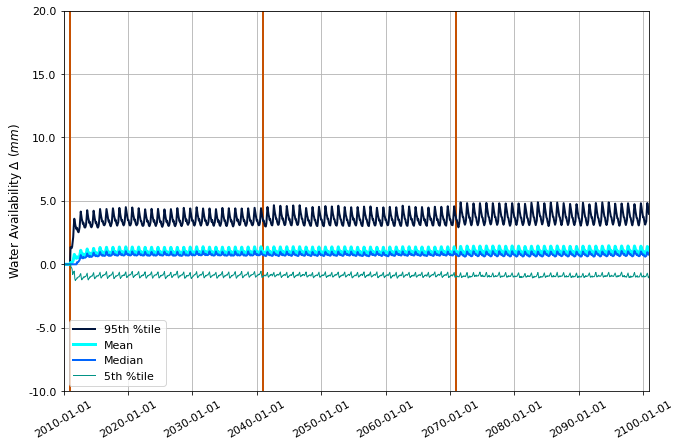

In [142]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.5, 7.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinWA, MaxWA], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinWA, MaxWA], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinWA, MaxWA], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( S1WatAv.index, S1WatAv[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', label='95th %tile')
ax11.plot( S1WatAv.index, S1WatAv[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', label='Mean' )
ax11.plot( S1WatAv.index, S1WatAv[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', label='Median')
ax11.plot( S1WatAv.index, S1WatAv[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:teal', label='5th %tile' )
ax11.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax11.set_yticks( waTicks )
ax11.set_ylim( (MinWA, MaxWA) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Water Availability $\Delta$ ($mm$)', fontsize=12)
ax11.grid( b=True )
ax11.legend( loc='lower left', fontsize=11 )
ax11.tick_params(axis='both', which='major', labelsize=11)
ax11.tick_params(axis='x', which='major', labelrotation=30.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )

In [143]:
GoodLen = len( S1WatAv )
GoodLen

1440

Butterworth, low pass filter

In [144]:
wAr = S1WatAv[StatsHdsList[95]].to_numpy()
S1_WA_95 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = S1WatAv[StatsHdsList[5]].to_numpy()
S1_WA_05 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = S1WatAv[StatsHdsList[75]].to_numpy()
S1_WA_75 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = S1WatAv[StatsHdsList[25]].to_numpy()
S1_WA_25 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = S1WatAv[StatsHdsList[50]].to_numpy()
S1_WA_Med = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = S1WatAv[StatsHdsList[101]].to_numpy()
S1_WA_Ave = butter_lowpass_filter(wAr, CUTOFF, FS )

In [145]:
S1_WA_F90 = list( S1_WA_05 )
BackDTList = list( S1_WA_95 )
BackWA_95 = BackDTList[::-1]
S1_WA_F90.extend( BackWA_95 )
S1_WA_IQR = list( S1_WA_25 )
BackDTList = list( S1_WA_75 )
BackWA_75 = BackDTList[::-1]
S1_WA_IQR.extend( BackWA_75 )

In [ ]:
#wAr = S1WatAv[StatsHdsList[95]].to_numpy()
#wArEx = np.append( wAr, (wAr[GoodLen-3] * np.ones( int(1.5*GoodLen) ) ), )
#rft = np.fft.rfft( wArEx )
#rft[(2*SM_NUM):] = 0.0
#FF_WA_95 = np.fft.irfft(rft)[:GoodLen]
#wAr = S1WatAv[StatsHdsList[5]].to_numpy()
#wArEx = np.append( wAr, (wAr[GoodLen-3] * np.ones( int(1.5*GoodLen) )), )
#rft = np.fft.rfft( wArEx )
#rft[(2*SM_NUM):] = 0.0
#FF_WA_5 = np.fft.irfft(rft)[:GoodLen]
#wAr = S1WatAv[StatsHdsList[75]].to_numpy()
#wArEx = np.append( wAr, (wAr[GoodLen-3] * np.ones( int(1.5*GoodLen) )), )
#rft = np.fft.rfft( wArEx )
#rft[(2*SM_NUM):] = 0.0
#FF_WA_75 = np.fft.irfft(rft)[:GoodLen]
#wAr = S1WatAv[StatsHdsList[25]].to_numpy()
#wArEx = np.append( wAr, (wAr[GoodLen-3] * np.ones( int(1.5*GoodLen) )), )
#rft = np.fft.rfft( wArEx )
#rft[(2*SM_NUM):] = 0.0
#FF_WA_25 = np.fft.irfft(rft)[:GoodLen]
#wAr = S1WatAv[StatsHdsList[50]].to_numpy()
#wArEx = np.append( wAr, (wAr[GoodLen-3] * np.ones( int(1.5*GoodLen) )), )
#rft = np.fft.rfft( wArEx )
#rft[(2*SM_NUM):] = 0.0
#FF_WA_50 = np.fft.irfft(rft)[:GoodLen]
#wAr = S1WatAv[StatsHdsList[101]].to_numpy()
#wArEx = np.append( wAr, (wAr[GoodLen-3] * np.ones( int(1.5*GoodLen) )), )
#rft = np.fft.rfft( wArEx )
#rft[(2*SM_NUM):] = 0.0
#FF_WA_me = np.fft.irfft(rft)[:GoodLen]

In [ ]:
#DTTL = list( S1WatAv.index.to_pydatetime() )
#BackDTList = DTTL[::-1]
#DTTimeList = deepcopy( DTTL )
#DTTimeList.extend( BackDTList )

In [ ]:
#len( FF_WA_50 )

In [ ]:
#WA_5 = list( FF_WA_5 )
#BackDTList = list( FF_WA_95 )
#BackWA_95 = BackDTList[::-1]
#WAVals90 = deepcopy( WA_5 )
#WAVals90.extend( BackWA_95 )

In [ ]:
#WA_25 = list( FF_WA_25 )
#BackDTList = list( FF_WA_75 )
#BackWA_75 = BackDTList[::-1]
#WAVals50 = deepcopy( WA_25 )
#WAVals50.extend( BackWA_75 )

In [146]:
MaxWA = 50.0
MinWA = -15.0

In [147]:
waTicks = [ -10.0, 0.0, 10.0, 20.0, 30.0 ]

In [148]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Results_DeltaWA_FB%s.svg" % SIM_ROOT ) )
OutSVG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Results_DeltaWA_FBDC_WGMN4.svg'

In [149]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Results_DeltaWA_FB%s.png" % SIM_ROOT ) )
OutPNG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Results_DeltaWA_FBDC_WGMN4.png'

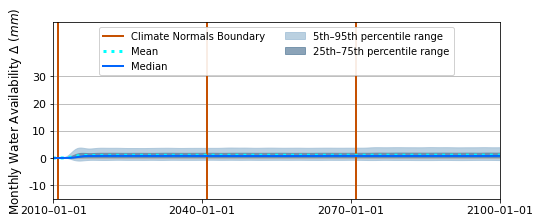

In [151]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 3.25)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinWA, MaxWA], linestyle='-',
           linewidth=2, color='xkcd:dark orange', label="Climate Normals Boundary")
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinWA, MaxWA], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinWA, MaxWA], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sF90 = ax11.fill( DTTimeList, S1_WA_F90, color='xkcd:light grey blue', alpha=0.70, 
                  label="5th–95th percentile range")
sF50 = ax11.fill( DTTimeList, S1_WA_IQR, color='xkcd:steel blue', alpha=0.70, 
                  label="25th–75th percentile range")
ax11.plot( S1WatAv.index, S1_WA_Ave, linestyle=':',
           linewidth=3, color='xkcd:cyan', label='Mean' )
ax11.plot( S1WatAv.index, S1_WA_Med, linestyle='-',
           linewidth=2, color='xkcd:bright blue', label='Median' )
ax11.set_xticks( [ dt.datetime(2010, 1, 1), dt.datetime(2040, 1, 1), dt.datetime(2070, 1, 1),
                  dt.datetime(2100, 1, 1) ] )
ax11.set_xlim( (dt.datetime(2010, 1, 1), dt.datetime(2100, 1, 1) ) )
ax11.set_yticks( waTicks )
ax11.set_ylim( (MinWA, MaxWA) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Monthly Water Availability $\Delta$ ($mm$)', fontsize=12)
ax11.legend( loc='upper center', fontsize=10, ncol=2, framealpha=0.9 )
ax11.tick_params(axis='both', which='major', labelsize=11)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y–%m–%d") )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

### All 5 Plots Together

In [ ]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Results_DeltaWB_%s.svg" % SIM_ROOT ) )
OutSVG

In [ ]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Results_DeltaWB_%s.png" % SIM_ROOT ) )
OutPNG

In [ ]:
alphVal = 0.85

In [ ]:
Fig1 = plt.figure()
Fig1.set_size_inches(15, 21)
ax11 = Fig1.add_subplot(5,1,1)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinPrecip, MaxPrecip], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinPrecip, MaxPrecip], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinPrecip, MaxPrecip], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( S1PreStats1.index, S1PreStats1[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', label='95th percentile', alpha=alphVal )
ax11.plot( S1PreStats2.index, S1PreStats2[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax11.plot( S1PreStats3.index, S1PreStats3[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax11.plot( S1PreStats4.index, S1PreStats4[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax11.plot( S1PreStats1.index, S1PreStats1[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', label='Mean', alpha=alphVal )
ax11.plot( S1PreStats2.index, S1PreStats2[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax11.plot( S1PreStats3.index, S1PreStats3[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax11.plot( S1PreStats4.index, S1PreStats4[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax11.plot( S1PreStats1.index, S1PreStats1[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', label='Median, 50th percentile', alpha=alphVal)
ax11.plot( S1PreStats2.index, S1PreStats2[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax11.plot( S1PreStats3.index, S1PreStats3[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax11.plot( S1PreStats4.index, S1PreStats4[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax11.plot( S1PreStats1.index, S1PreStats1[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', label='5th percentile', alpha=alphVal )
ax11.plot( S1PreStats2.index, S1PreStats2[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax11.plot( S1PreStats3.index, S1PreStats3[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax11.plot( S1PreStats4.index, S1PreStats4[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax11.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax11.set_yticks( preTicks )
ax11.set_ylim( (MinPrecip, MaxPrecip) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Precipitation $\Delta$ ($mm$)', fontsize=12)
ax11.legend( loc='lower center', fontsize=10.0, ncol=2)
ax11.tick_params(axis='both', which='major', labelsize=11)
ax11.tick_params(axis='x', which='major', labelrotation=0.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax11.annotate("A", xy=(0.88,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax11.annotate("Projection Interval 1", xy=(0.10, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax11.annotate("Projection Interval 2", xy=(0.43, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax11.annotate("Projection Interval 3", xy=(0.77, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax21 = Fig1.add_subplot(5,1,2)
ax21.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinPET, MaxPET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax21.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinPET, MaxPET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax21.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinPET, MaxPET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax21.plot( S1PETStats1.index, S1PETStats1[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', label='95th percentile', alpha=alphVal )
ax21.plot( S1PETStats2.index, S1PETStats2[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax21.plot( S1PETStats3.index, S1PETStats3[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax21.plot( S1PETStats4.index, S1PETStats4[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax21.plot( S1PETStats1.index, S1PETStats1[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', label='Mean', alpha=alphVal )
ax21.plot( S1PETStats2.index, S1PETStats2[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax21.plot( S1PETStats3.index, S1PETStats3[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax21.plot( S1PETStats4.index, S1PETStats4[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax21.plot( S1PETStats1.index, S1PETStats1[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', label='Median, 50th percentile', alpha=alphVal)
ax21.plot( S1PETStats2.index, S1PETStats2[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax21.plot( S1PETStats3.index, S1PETStats3[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax21.plot( S1PETStats4.index, S1PETStats4[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax21.plot( S1PETStats1.index, S1PETStats1[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', label='5th percentile', alpha=alphVal )
ax21.plot( S1PETStats2.index, S1PETStats2[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax21.plot( S1PETStats3.index, S1PETStats3[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax21.plot( S1PETStats4.index, S1PETStats4[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax21.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax21.set_yticks( petTicks )
ax21.set_ylim( (MinPET, MaxPET) )
ax21.grid(True, axis='y', which='both')
ax21.set_ylabel('PET $\Delta$ ($mm$)', fontsize=12)
ax21.legend( loc='lower center', fontsize=10.0, ncol=2)
ax21.tick_params(axis='both', which='major', labelsize=11)
ax21.tick_params(axis='x', which='major', labelrotation=0.0)
ax21.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax21.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax21.annotate("B", xy=(0.88,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax21.annotate("Projection Interval 1", xy=(0.10, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax21.annotate("Projection Interval 2", xy=(0.43, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax21.annotate("Projection Interval 3", xy=(0.77, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax31 = Fig1.add_subplot(5,1,3)
ax31.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinAET, MaxAET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax31.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinAET, MaxAET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax31.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinAET, MaxAET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax31.plot( S1AETStats1.index, S1AETStats1[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', label='95th percentile', alpha=alphVal)
ax31.plot( S1AETStats2.index, S1AETStats2[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax31.plot( S1AETStats3.index, S1AETStats3[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax31.plot( S1AETStats4.index, S1AETStats4[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax31.plot( S1AETStats1.index, S1AETStats1[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', label='Mean', alpha=alphVal )
ax31.plot( S1AETStats2.index, S1AETStats2[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax31.plot( S1AETStats3.index, S1AETStats3[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax31.plot( S1AETStats4.index, S1AETStats4[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax31.plot( S1AETStats1.index, S1AETStats1[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', label='Median, 50th percentile', alpha=alphVal)
ax31.plot( S1AETStats2.index, S1AETStats2[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax31.plot( S1AETStats3.index, S1AETStats3[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax31.plot( S1AETStats4.index, S1AETStats4[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax31.plot( S1AETStats1.index, S1AETStats1[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', label='5th percentile', alpha=alphVal )
ax31.plot( S1AETStats2.index, S1AETStats2[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax31.plot( S1AETStats3.index, S1AETStats3[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax31.plot( S1AETStats4.index, S1AETStats4[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax31.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax31.set_yticks( aetTicks )
ax31.set_ylim( (MinAET, MaxAET) )
ax31.grid(True, axis='y', which='both')
ax31.set_ylabel('AET $\Delta$ ($mm$)', fontsize=12)
ax31.legend( loc='lower center', fontsize=10.0, ncol=2 )
ax31.tick_params(axis='both', which='major', labelsize=11)
ax31.tick_params(axis='x', which='major', labelrotation=0.0)
ax31.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax31.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax31.annotate("C", xy=(0.88,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax31.annotate("Projection Interval 1", xy=(0.10, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax31.annotate("Projection Interval 2", xy=(0.43, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax31.annotate("Projection Interval 3", xy=(0.77, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax41 = Fig1.add_subplot(5,1,4)
ax41.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinRO, MaxRO], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax41.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinRO, MaxRO], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax41.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinRO, MaxRO], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax41.plot( S1ROStats1.index, S1ROStats1[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', label='95th percentile', alpha=alphVal)
ax41.plot( S1ROStats2.index, S1ROStats2[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax41.plot( S1ROStats3.index, S1ROStats3[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax41.plot( S1ROStats4.index, S1ROStats4[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax41.plot( S1ROStats1.index, S1ROStats1[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', label='Mean, 50th percentile', alpha=alphVal )
ax41.plot( S1ROStats2.index, S1ROStats2[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax41.plot( S1ROStats3.index, S1ROStats3[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax41.plot( S1ROStats4.index, S1ROStats4[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax41.plot( S1ROStats1.index, S1ROStats1[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', label='Median', alpha=alphVal)
ax41.plot( S1ROStats2.index, S1ROStats2[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax41.plot( S1ROStats3.index, S1ROStats3[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax41.plot( S1ROStats4.index, S1ROStats4[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax41.plot( S1ROStats1.index, S1ROStats1[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', label='5th percentile', alpha=alphVal )
ax41.plot( S1ROStats2.index, S1ROStats2[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax41.plot( S1ROStats3.index, S1ROStats3[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax41.plot( S1ROStats4.index, S1ROStats4[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax41.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax41.set_yticks( roTicks )
ax41.set_ylim( (MinRO, MaxRO) )
ax41.grid(True, axis='y', which='both')
ax41.set_ylabel('Runoff $\Delta$ ($mm$)', fontsize=12)
ax41.legend( loc='lower center', fontsize=10.0, ncol=2 )
ax41.tick_params(axis='both', which='major', labelsize=11)
ax41.tick_params(axis='x', which='major', labelrotation=0.0)
ax41.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax41.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax41.annotate("D", xy=(0.88,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax41.annotate("Projection Interval 1", xy=(0.10, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax41.annotate("Projection Interval 2", xy=(0.43, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax41.annotate("Projection Interval 3", xy=(0.77, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax51 = Fig1.add_subplot(5,1,5)
ax51.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinRE, MaxRE], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax51.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinRE, MaxRE], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax51.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinRE, MaxRE], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax51.plot( S1REStats1.index, S1REStats1[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', label='95th percentile', alpha=alphVal)
ax51.plot( S1REStats2.index, S1REStats2[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax51.plot( S1REStats3.index, S1REStats3[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax51.plot( S1REStats4.index, S1REStats4[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax51.plot( S1REStats1.index, S1REStats1[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', label='Mean', alpha=alphVal )
ax51.plot( S1REStats2.index, S1REStats2[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax51.plot( S1REStats3.index, S1REStats3[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax51.plot( S1REStats4.index, S1REStats4[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax51.plot( S1REStats1.index, S1REStats1[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', label='Median, 50th percentile', alpha=alphVal)
ax51.plot( S1REStats2.index, S1REStats2[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax51.plot( S1REStats3.index, S1REStats3[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax51.plot( S1REStats4.index, S1REStats4[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax51.plot( S1REStats1.index, S1REStats1[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', label='5th percentile', alpha=alphVal )
ax51.plot( S1REStats2.index, S1REStats2[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax51.plot( S1REStats3.index, S1REStats3[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax51.plot( S1REStats4.index, S1REStats4[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax51.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax51.set_yticks( reTicks )
ax51.set_ylim( (MinRE, MaxRE) )
ax51.grid(True, axis='y', which='both')
ax51.set_ylabel('Recharge $\Delta$ ($mm$)', fontsize=12)
ax51.legend( loc='lower center', fontsize=10.0, ncol=2 )
ax51.tick_params(axis='both', which='major', labelsize=11)
ax51.tick_params(axis='x', which='major', labelrotation=0.0)
ax51.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax51.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax51.annotate("E", xy=(0.88,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax51.annotate("Projection Interval 1", xy=(0.10, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax51.annotate("Projection Interval 2", xy=(0.43, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax51.annotate("Projection Interval 3", xy=(0.77, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

### 3 WB Components Together

In [ ]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Results_MWB-3WB_%s.svg" % SIM_ROOT ) )
OutSVG

In [ ]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Results_MWB-3WB_%s.png" % SIM_ROOT ) )
OutPNG

In [ ]:
alphVal = 0.85

In [ ]:
Fig1 = plt.figure()
Fig1.set_size_inches(15, 21)
ax31 = Fig1.add_subplot(3,1,1)
ax31.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinAET, MaxAET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax31.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinAET, MaxAET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax31.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinAET, MaxAET], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax31.plot( S1AETStats1.index, S1AETStats1[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', label='95th percentile', alpha=alphVal)
ax31.plot( S1AETStats2.index, S1AETStats2[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax31.plot( S1AETStats3.index, S1AETStats3[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax31.plot( S1AETStats4.index, S1AETStats4[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax31.plot( S1AETStats1.index, S1AETStats1[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', label='Mean', alpha=alphVal )
ax31.plot( S1AETStats2.index, S1AETStats2[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax31.plot( S1AETStats3.index, S1AETStats3[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax31.plot( S1AETStats4.index, S1AETStats4[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax31.plot( S1AETStats1.index, S1AETStats1[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', label='Median, 50th percentile', alpha=alphVal)
ax31.plot( S1AETStats2.index, S1AETStats2[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax31.plot( S1AETStats3.index, S1AETStats3[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax31.plot( S1AETStats4.index, S1AETStats4[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax31.plot( S1AETStats1.index, S1AETStats1[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', label='5th percentile', alpha=alphVal )
ax31.plot( S1AETStats2.index, S1AETStats2[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax31.plot( S1AETStats3.index, S1AETStats3[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax31.plot( S1AETStats4.index, S1AETStats4[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax31.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax31.set_yticks( aetTicks )
ax31.set_ylim( (MinAET, MaxAET) )
ax31.grid(True, axis='y', which='both')
ax31.set_ylabel('AET $\Delta$ ($mm$)', fontsize=13)
ax31.legend( loc='lower center', fontsize=11.0, ncol=2 )
ax31.tick_params(axis='both', which='major', labelsize=12)
ax31.tick_params(axis='x', which='major', labelrotation=0.0)
ax31.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax31.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax31.annotate("A", xy=(0.88,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax31.annotate("Projection Interval 1", xy=(0.10, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax31.annotate("Projection Interval 2", xy=(0.43, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax31.annotate("Projection Interval 3", xy=(0.77, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax41 = Fig1.add_subplot(3,1,2)
ax41.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinRO, MaxRO], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax41.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinRO, MaxRO], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax41.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinRO, MaxRO], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax41.plot( S1ROStats1.index, S1ROStats1[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', label='95th percentile', alpha=alphVal)
ax41.plot( S1ROStats2.index, S1ROStats2[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax41.plot( S1ROStats3.index, S1ROStats3[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax41.plot( S1ROStats4.index, S1ROStats4[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax41.plot( S1ROStats1.index, S1ROStats1[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', label='Mean, 50th percentile', alpha=alphVal )
ax41.plot( S1ROStats2.index, S1ROStats2[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax41.plot( S1ROStats3.index, S1ROStats3[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax41.plot( S1ROStats4.index, S1ROStats4[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax41.plot( S1ROStats1.index, S1ROStats1[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', label='Median', alpha=alphVal)
ax41.plot( S1ROStats2.index, S1ROStats2[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax41.plot( S1ROStats3.index, S1ROStats3[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax41.plot( S1ROStats4.index, S1ROStats4[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax41.plot( S1ROStats1.index, S1ROStats1[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', label='5th percentile', alpha=alphVal )
ax41.plot( S1ROStats2.index, S1ROStats2[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax41.plot( S1ROStats3.index, S1ROStats3[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax41.plot( S1ROStats4.index, S1ROStats4[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax41.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax41.set_yticks( roTicks )
ax41.set_ylim( (MinRO, MaxRO) )
ax41.grid(True, axis='y', which='both')
ax41.set_ylabel('Runoff $\Delta$ ($mm$)', fontsize=13)
ax41.legend( loc='lower center', fontsize=11.0, ncol=2 )
ax41.tick_params(axis='both', which='major', labelsize=12)
ax41.tick_params(axis='x', which='major', labelrotation=0.0)
ax41.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax41.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax41.annotate("B", xy=(0.88,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax41.annotate("Projection Interval 1", xy=(0.10, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax41.annotate("Projection Interval 2", xy=(0.43, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax41.annotate("Projection Interval 3", xy=(0.77, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax51 = Fig1.add_subplot(3,1,3)
ax51.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinRE, MaxRE], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax51.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinRE, MaxRE], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax51.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinRE, MaxRE], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax51.plot( S1REStats1.index, S1REStats1[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', label='95th percentile', alpha=alphVal)
ax51.plot( S1REStats2.index, S1REStats2[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax51.plot( S1REStats3.index, S1REStats3[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax51.plot( S1REStats4.index, S1REStats4[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax51.plot( S1REStats1.index, S1REStats1[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', label='Mean', alpha=alphVal )
ax51.plot( S1REStats2.index, S1REStats2[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax51.plot( S1REStats3.index, S1REStats3[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax51.plot( S1REStats4.index, S1REStats4[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax51.plot( S1REStats1.index, S1REStats1[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', label='Median, 50th percentile', alpha=alphVal)
ax51.plot( S1REStats2.index, S1REStats2[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax51.plot( S1REStats3.index, S1REStats3[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax51.plot( S1REStats4.index, S1REStats4[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax51.plot( S1REStats1.index, S1REStats1[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', label='5th percentile', alpha=alphVal )
ax51.plot( S1REStats2.index, S1REStats2[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax51.plot( S1REStats3.index, S1REStats3[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax51.plot( S1REStats4.index, S1REStats4[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax51.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax51.set_yticks( reTicks )
ax51.set_ylim( (MinRE, MaxRE) )
ax51.grid(True, axis='y', which='both')
ax51.set_ylabel('Recharge $\Delta$ ($mm$)', fontsize=13)
ax51.legend( loc='lower center', fontsize=11.0, ncol=2 )
ax51.tick_params(axis='both', which='major', labelsize=12)
ax51.tick_params(axis='x', which='major', labelrotation=0.0)
ax51.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax51.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax51.annotate("C", xy=(0.88,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax51.annotate("Projection Interval 1", xy=(0.10, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax51.annotate("Projection Interval 2", xy=(0.43, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax51.annotate("Projection Interval 3", xy=(0.77, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

In [ ]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "MWB_FS-3WB_%s.svg" % SIM_ROOT ) )
OutSVG

In [ ]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "MWB_FS-3WB_%s.png" % SIM_ROOT ) )
OutPNG

In [ ]:
fsTicks = [ -20.0, -10.0, 0.0, 10.0, 20.0 ]

In [ ]:
Fig1 = plt.figure()
Fig1.set_size_inches(15, 21)
ax31 = Fig1.add_subplot(3,1,1)
ax31.plot( [TP_DICT[2][0], TP_DICT[2][0]], [-25.0, 25.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax31.plot( [TP_DICT[3][0], TP_DICT[3][0]], [-25.0, 25.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax31.plot( [TP_DICT[4][0], TP_DICT[4][0]], [-25.0, 25.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF = ax31.fill( DTTimeList, AETVals, color='xkcd:greyish purple', alpha=0.50, 
                 label="5th to 95th percentile range" )
ax31.plot( S1AETStats2.index, FF_AET2_me, linestyle='-',
           linewidth=3, color='xkcd:blurple', label='Mean' )
ax31.plot( S1AETStats3.index, FF_AET3_me, linestyle='-',
           linewidth=3, color='xkcd:blurple' )
ax31.plot( S1AETStats4.index, FF_AET4_me, linestyle='-',
           linewidth=3, color='xkcd:blurple' )
ax31.plot( S1AETStats2.index, FF_AET2_50, linestyle='dashed',
           linewidth=2, color='xkcd:dark lilac', label='Median' )
ax31.plot( S1AETStats3.index, FF_AET3_50, linestyle='dashed',
           linewidth=2, color='xkcd:dark lilac' )
ax31.plot( S1AETStats4.index, FF_AET4_50, linestyle='dashed',
           linewidth=2, color='xkcd:dark lilac' )
ax31.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax31.set_yticks( fsTicks )
ax31.set_ylim( (-25.0, 25.0) )
ax31.grid(True, axis='y', which='both')
ax31.set_ylabel('AET $\Delta$ ($mm$)', fontsize=14)
ax31.legend( loc='lower center', fontsize=12.0, ncol=3 )
ax31.tick_params(axis='both', which='major', labelsize=13)
ax31.tick_params(axis='x', which='major', labelrotation=0.0)
ax31.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax31.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax31.annotate("A", xy=(0.88,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax31.annotate("Projection Interval 1", xy=(0.10, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax31.annotate("Projection Interval 2", xy=(0.43, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax31.annotate("Projection Interval 3", xy=(0.77, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax41 = Fig1.add_subplot(3,1,2)
ax41.plot( [TP_DICT[2][0], TP_DICT[2][0]], [-25.0, 25.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax41.plot( [TP_DICT[3][0], TP_DICT[3][0]], [-25.0, 25.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax41.plot( [TP_DICT[4][0], TP_DICT[4][0]], [-25.0, 25.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF = ax41.fill( DTTimeList, ROVals, color='xkcd:dark sand', alpha=0.50, 
                 label="5th to 95th percentile range")
ax41.plot( S1ROStats2.index, FF_RO2_me, linestyle='-',
           linewidth=3, color='xkcd:warm brown', label='Mean' )
ax41.plot( S1ROStats3.index, FF_RO3_me, linestyle='-',
           linewidth=3, color='xkcd:warm brown' )
ax41.plot( S1ROStats4.index, FF_RO4_me, linestyle='-',
           linewidth=3, color='xkcd:warm brown' )
ax41.plot( S1ROStats2.index, FF_RO2_50, linestyle='dashed',
           linewidth=2, color='xkcd:mud brown', label='Median' )
ax41.plot( S1ROStats3.index, FF_RO3_50, linestyle='dashed',
           linewidth=2, color='xkcd:mud brown' )
ax41.plot( S1ROStats4.index, FF_RO4_50, linestyle='dashed',
           linewidth=2, color='xkcd:mud brown' )
ax41.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax41.set_yticks( fsTicks )
ax41.set_ylim( (-25.0, 25.0) )
ax41.grid(True, axis='y', which='both')
ax41.set_ylabel('Runoff $\Delta$ ($mm$)', fontsize=14)
ax41.legend( loc='lower center', fontsize=12.0, ncol=3 )
ax41.tick_params(axis='both', which='major', labelsize=13)
ax41.tick_params(axis='x', which='major', labelrotation=0.0)
ax41.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax41.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax41.annotate("B", xy=(0.88,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax41.annotate("Projection Interval 1", xy=(0.10, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax41.annotate("Projection Interval 2", xy=(0.43, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax41.annotate("Projection Interval 3", xy=(0.77, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax51 = Fig1.add_subplot(3,1,3)
ax51.plot( [TP_DICT[2][0], TP_DICT[2][0]], [-25.0, 25.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax51.plot( [TP_DICT[3][0], TP_DICT[3][0]], [-25.0, 25.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax51.plot( [TP_DICT[4][0], TP_DICT[4][0]], [-25.0, 25.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF = ax51.fill( DTTimeList, REVals, color='xkcd:green grey', alpha=0.50, 
                 label="5th to 95th percentile range")
ax51.plot( S1REStats2.index, FF_RE2_me, linestyle='-',
           linewidth=3, color='xkcd:pine', label='Mean' )
ax51.plot( S1REStats3.index, FF_RE3_me, linestyle='-',
           linewidth=3, color='xkcd:pine' )
ax51.plot( S1REStats4.index, FF_RE4_me, linestyle='-',
           linewidth=3, color='xkcd:pine' )
ax51.plot( S1REStats2.index, FF_RE2_50, linestyle='dashed',
           linewidth=2, color='xkcd:kelley green', label='Median' )
ax51.plot( S1REStats3.index, FF_RE3_50, linestyle='dashed',
           linewidth=2, color='xkcd:kelley green' )
ax51.plot( S1REStats4.index, FF_RE4_50, linestyle='dashed',
           linewidth=2, color='xkcd:kelley green' )
ax51.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax51.set_yticks( fsTicks )
ax51.set_ylim( (-25.0, 25.0) )
ax51.grid(True, axis='y', which='both')
ax51.set_ylabel('Recharge $\Delta$ ($mm$)', fontsize=14)
ax51.legend( loc='lower center', fontsize=12.0, ncol=3 )
ax51.tick_params(axis='both', which='major', labelsize=13)
ax51.tick_params(axis='x', which='major', labelrotation=0.0)
ax51.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax51.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax51.annotate("C", xy=(0.88,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax51.annotate("Projection Interval 1", xy=(0.10, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax51.annotate("Projection Interval 2", xy=(0.43, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax51.annotate("Projection Interval 3", xy=(0.77, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

### 2 Weather Plots Together

In [ ]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Results_MWB-2Weather_%s.svg" % SIM_ROOT ) )
OutSVG

In [ ]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Results_MWB-2Weather_%s.png" % SIM_ROOT ) )
OutPNG

In [ ]:
wpTicks = [ -20.0, 0.0, 20.0, 40.0, 60.0 ]

In [ ]:
alphVal = 0.85

In [ ]:
Fig1 = plt.figure()
Fig1.set_size_inches(15, 14)
ax11 = Fig1.add_subplot(2,1,1)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [-35.0, 70.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [-35.0, 70.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [-35.0, 70.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( S1PreStats1.index, S1PreStats1[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', label='95th percentile', alpha=alphVal )
ax11.plot( S1PreStats2.index, S1PreStats2[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax11.plot( S1PreStats3.index, S1PreStats3[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax11.plot( S1PreStats4.index, S1PreStats4[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax11.plot( S1PreStats1.index, S1PreStats1[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', label='Mean', alpha=alphVal )
ax11.plot( S1PreStats2.index, S1PreStats2[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax11.plot( S1PreStats3.index, S1PreStats3[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax11.plot( S1PreStats4.index, S1PreStats4[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax11.plot( S1PreStats1.index, S1PreStats1[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', label='Median', alpha=alphVal)
ax11.plot( S1PreStats2.index, S1PreStats2[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax11.plot( S1PreStats3.index, S1PreStats3[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax11.plot( S1PreStats4.index, S1PreStats4[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax11.plot( S1PreStats1.index, S1PreStats1[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', label='5th percentile', alpha=alphVal )
ax11.plot( S1PreStats2.index, S1PreStats2[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax11.plot( S1PreStats3.index, S1PreStats3[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax11.plot( S1PreStats4.index, S1PreStats4[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax11.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax11.set_yticks( wpTicks )
ax11.set_ylim( (-35.0, 70.0) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Precipitation $\Delta$ ($mm$)', fontsize=13)
ax11.legend( loc='lower center', fontsize=11.0, ncol=2)
ax11.tick_params(axis='both', which='major', labelsize=12)
ax11.tick_params(axis='x', which='major', labelrotation=0.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax11.annotate("A", xy=(0.88,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax11.annotate("Projection Interval 1", xy=(0.10, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax11.annotate("Projection Interval 2", xy=(0.43, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax11.annotate("Projection Interval 3", xy=(0.77, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax21 = Fig1.add_subplot(2,1,2)
ax21.plot( [TP_DICT[2][0], TP_DICT[2][0]], [-35.0, 70.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax21.plot( [TP_DICT[3][0], TP_DICT[3][0]], [-35.0, 70.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax21.plot( [TP_DICT[4][0], TP_DICT[4][0]], [-35.0, 70.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax21.plot( S1PETStats1.index, S1PETStats1[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', label='95th percentile', alpha=alphVal )
ax21.plot( S1PETStats2.index, S1PETStats2[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax21.plot( S1PETStats3.index, S1PETStats3[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax21.plot( S1PETStats4.index, S1PETStats4[StatsHdsList[95]], linestyle='-',
           linewidth=2, color='xkcd:navy', alpha=alphVal )
ax21.plot( S1PETStats1.index, S1PETStats1[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', label='Mean', alpha=alphVal )
ax21.plot( S1PETStats2.index, S1PETStats2[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax21.plot( S1PETStats3.index, S1PETStats3[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax21.plot( S1PETStats4.index, S1PETStats4[StatsHdsList[101]], linestyle='-',
           linewidth=3, color='xkcd:cyan', alpha=alphVal )
ax21.plot( S1PETStats1.index, S1PETStats1[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', label='Median', alpha=alphVal)
ax21.plot( S1PETStats2.index, S1PETStats2[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax21.plot( S1PETStats3.index, S1PETStats3[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax21.plot( S1PETStats4.index, S1PETStats4[StatsHdsList[50]], linestyle='-',
           linewidth=2, color='xkcd:bright blue', alpha=alphVal )
ax21.plot( S1PETStats1.index, S1PETStats1[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', label='5th percentile', alpha=alphVal )
ax21.plot( S1PETStats2.index, S1PETStats2[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax21.plot( S1PETStats3.index, S1PETStats3[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax21.plot( S1PETStats4.index, S1PETStats4[StatsHdsList[5]], linestyle='-',
           linewidth=1, color='xkcd:steel blue', alpha=alphVal )
ax21.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax21.set_yticks( wpTicks )
ax21.set_ylim( (-35.0, 70.0) )
ax21.grid(True, axis='y', which='both')
ax21.set_ylabel('PET $\Delta$ ($mm$)', fontsize=13)
ax21.legend( loc='lower center', fontsize=11.0, ncol=2)
ax21.tick_params(axis='both', which='major', labelsize=12)
ax21.tick_params(axis='x', which='major', labelrotation=0.0)
ax21.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax21.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax21.annotate("B", xy=(0.88,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax21.annotate("Projection Interval 1", xy=(0.10, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax21.annotate("Projection Interval 2", xy=(0.43, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax21.annotate("Projection Interval 3", xy=(0.77, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

In [ ]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "MWB_FS-2Weather_%s.svg" % SIM_ROOT ) )
OutSVG

In [ ]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "MWB_FS-2Weather_%s.png" % SIM_ROOT ) )
OutPNG

In [ ]:
wfsTicks = [ -10.0, 0.0, 10.0, 20.0, 30.0 ]

In [ ]:
Fig1 = plt.figure()
Fig1.set_size_inches(15.0, 14.0)
ax11 = Fig1.add_subplot(2,1,1)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [-15.0, 35.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [-15.0, 35.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [-15.0, 35.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF = ax11.fill( DTTimeList, PreVals, color='xkcd:steel blue', alpha=0.50, 
                 label="5th to 95th percentile range")
ax11.plot( S1PreStats2.index, FF_Pre2_me, linestyle='-',
           linewidth=3, color='xkcd:cyan', label='Mean' )
ax11.plot( S1PreStats3.index, FF_Pre3_me, linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( S1PreStats4.index, FF_Pre4_me, linestyle='-',
           linewidth=3, color='xkcd:cyan' )
ax11.plot( S1PreStats2.index, FF_Pre2_50, linestyle='dashed',
           linewidth=3, color='xkcd:bright blue', label='Median' )
ax11.plot( S1PreStats3.index, FF_Pre3_50, linestyle='dashed',
           linewidth=3, color='xkcd:bright blue' )
ax11.plot( S1PreStats4.index, FF_Pre4_50, linestyle='dashed',
           linewidth=3, color='xkcd:bright blue' )
ax11.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax11.set_yticks( wfsTicks )
ax11.set_ylim( (-15.0, 35.0) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Precipitation $\Delta$ ($mm$)', fontsize=14)
ax11.legend( loc='lower center', fontsize=12.0, ncol=3)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.tick_params(axis='x', which='major', labelrotation=0.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax11.annotate("A", xy=(0.88,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax11.annotate("Projection Interval 1", xy=(0.10, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax11.annotate("Projection Interval 2", xy=(0.43, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax11.annotate("Projection Interval 3", xy=(0.77, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax21 = Fig1.add_subplot(2,1,2)
ax21.plot( [TP_DICT[2][0], TP_DICT[2][0]], [-15.0, 35.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax21.plot( [TP_DICT[3][0], TP_DICT[3][0]], [-15.0, 35.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax21.plot( [TP_DICT[4][0], TP_DICT[4][0]], [-15.0, 35.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF = ax21.fill( DTTimeList, PETVals, color='xkcd:dusty rose', alpha=0.50, 
                 label="5th to 95th percentile range")
ax21.plot( S1PETStats2.index, FF_PET2_me, linestyle='-',
           linewidth=3, label='Mean', color='xkcd:wine red' )
ax21.plot( S1PETStats3.index, FF_PET3_me, linestyle='-',
           linewidth=3, color='xkcd:wine red' )
ax21.plot( S1PETStats4.index, FF_PET4_me, linestyle='-',
           linewidth=3, color='xkcd:wine red' )
ax21.plot( S1PETStats2.index, FF_PET2_50, linestyle='dashed',
           linewidth=2, label='Median', color='xkcd:raspberry' )
ax21.plot( S1PETStats3.index, FF_PET3_50, linestyle='dashed',
           linewidth=2, color='xkcd:raspberry' )
ax21.plot( S1PETStats4.index, FF_PET4_50, linestyle='dashed',
           linewidth=2, color='xkcd:raspberry' )
ax21.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax21.set_yticks( wfsTicks )
ax21.set_ylim( (-15.0, 35.0) )
ax21.grid(True, axis='y', which='both')
ax21.set_ylabel('PET $\Delta$ ($mm$)', fontsize=14)
ax21.legend( loc='lower center', fontsize=12.0, ncol=3)
ax21.tick_params(axis='both', which='major', labelsize=13)
ax21.tick_params(axis='x', which='major', labelrotation=0.0)
ax21.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax21.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax21.annotate("B", xy=(0.88,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax21.annotate("Projection Interval 1", xy=(0.10, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax21.annotate("Projection Interval 2", xy=(0.43, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax21.annotate("Projection Interval 3", xy=(0.77, 0.92), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )